               BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Training Data

In [51]:
Bank_TD_Train=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
Bank_TD_Train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [52]:
Bank_TD_Train.shape

(31647, 18)

The Training data has 31647 rows and 18 columns.

•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)
   


In [53]:
Bank_TD_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [54]:
Bank_TD_Train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

There are 8 numerical data and 10 categorical data present in the Training dataset.

Id, Age,Balance,Day,Duration,Campaign,pdays,previous - Numerical Data.  
Job,Marital,Education,Default,Housing,Loan,Contact,Month,poutcome,Subscribed - Categorical data

In [55]:
Bank_TD_Train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no null values in the dataset

In [56]:
Bank_TD_Train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Outliers present in the age,balance,duration,campaign,pdays and previous columns.

## Exploratory Data Analysis

#### Univariate Analysis
        
       

<function matplotlib.pyplot.show(close=None, block=None)>

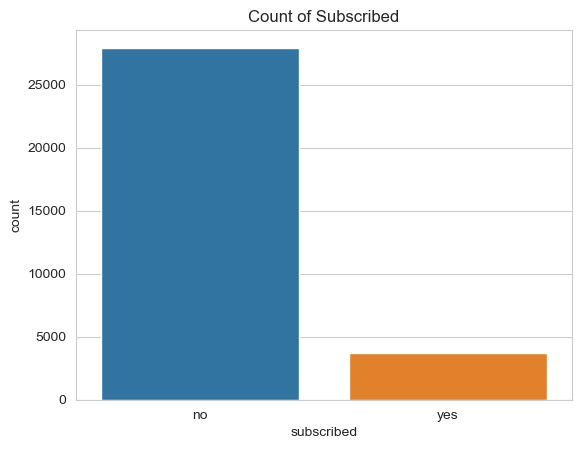

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='subscribed',data=Bank_TD_Train)
plt.title('Count of Subscribed')
plt.show

In [58]:
Bank_TD_Train['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

As we see in the count plot , the term deposit subscribed count is 3715 and not subscribed is 27932

<function matplotlib.pyplot.show(close=None, block=None)>

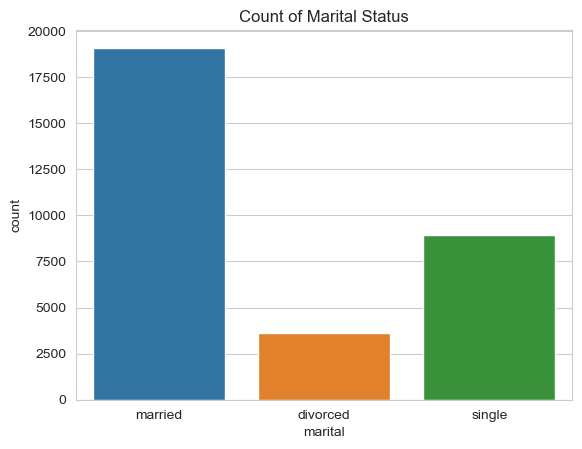

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='marital',data=Bank_TD_Train)
plt.title('Count of Marital Status')
plt.show

In [60]:
Bank_TD_Train['marital'].value_counts()

marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64

As observed in the count plot , the married count is 19095,single is 8922 and divorced is 3630

<function matplotlib.pyplot.show(close=None, block=None)>

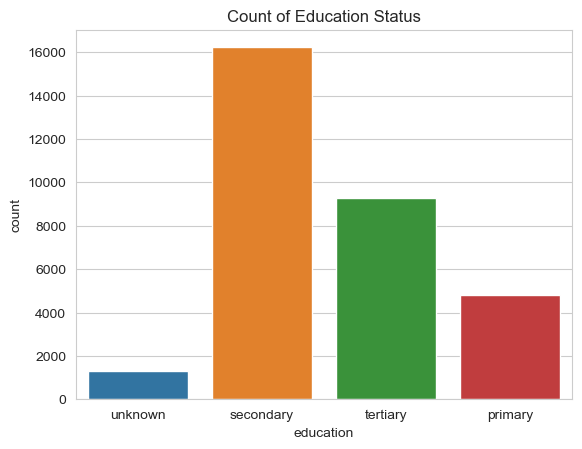

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='education',data=Bank_TD_Train)
plt.title('Count of Education Status')
plt.show

In [62]:
Bank_TD_Train['education'].value_counts()

education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

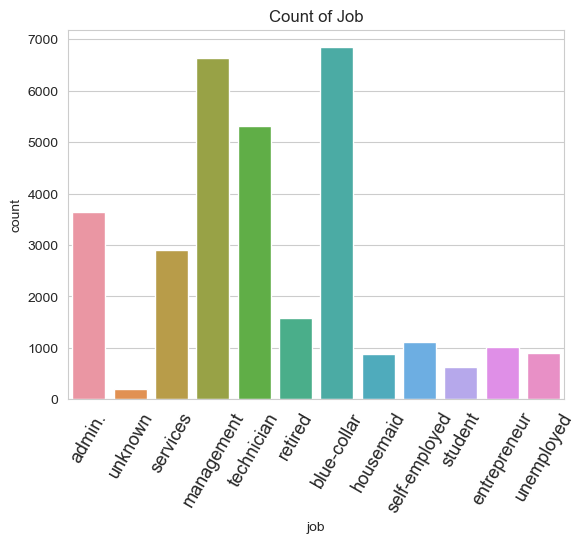

In [63]:
sns.set_style('whitegrid')
sns.countplot(x='job',data=Bank_TD_Train)
plt.xticks(rotation=60,fontsize=13)
plt.title('Count of Job')
plt.show

In [64]:
Bank_TD_Train['job'].value_counts()

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

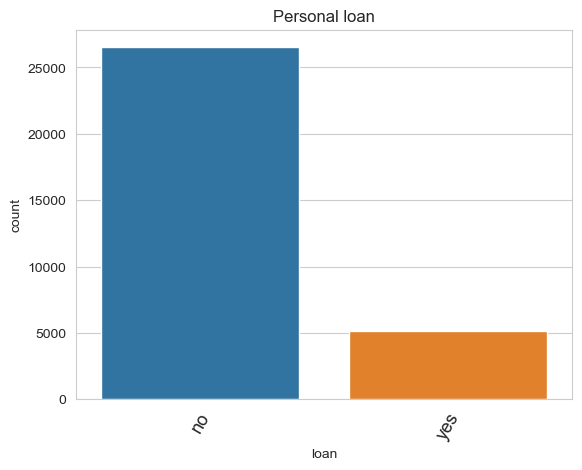

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='loan',data=Bank_TD_Train)
plt.xticks(rotation=60,fontsize=13)
plt.title('Personal loan')
plt.show

In [66]:
Bank_TD_Train['loan'].value_counts()

loan
no     26516
yes     5131
Name: count, dtype: int64

The customers who avail personal loan count is 5131 and who did not avail loan is 26516

<function matplotlib.pyplot.show(close=None, block=None)>

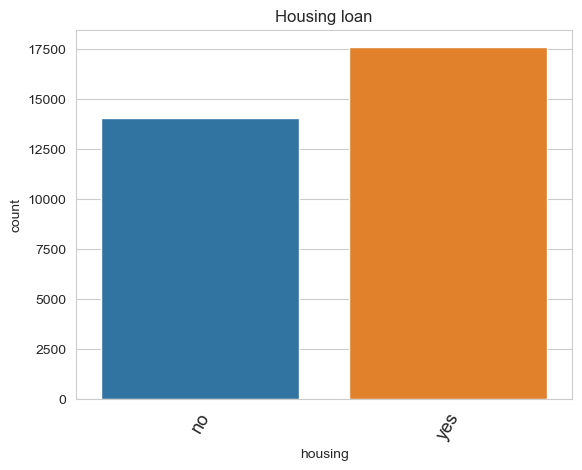

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='housing',data=Bank_TD_Train)
plt.xticks(rotation=60,fontsize=13)
plt.title('Housing loan')
plt.show

In [68]:
Bank_TD_Train['housing'].value_counts()

housing
yes    17584
no     14063
Name: count, dtype: int64

The customers who avail housing loan count is 17584 and who did not avail housing loan is 14063

<function matplotlib.pyplot.show(close=None, block=None)>

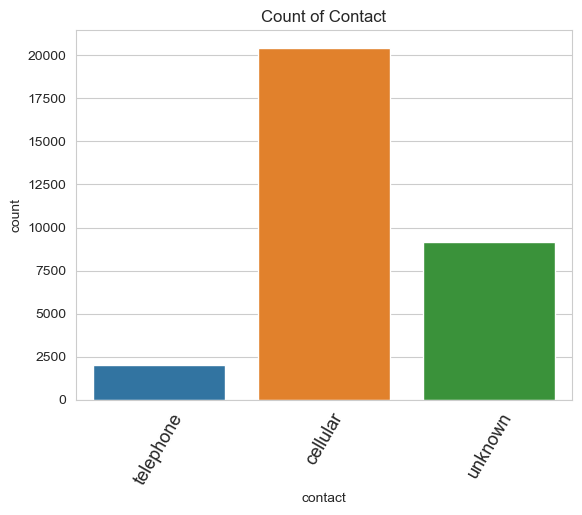

In [69]:
sns.set_style('whitegrid')
sns.countplot(x='contact',data=Bank_TD_Train)
plt.xticks(rotation=60,fontsize=13)
plt.title('Count of Contact')
plt.show

In [70]:
Bank_TD_Train['contact'].value_counts()

contact
cellular     20423
unknown       9177
telephone     2047
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

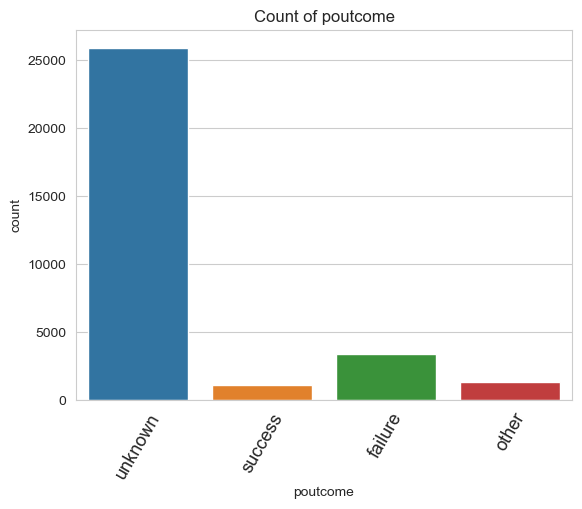

In [71]:
sns.set_style('whitegrid')
sns.countplot(x='poutcome',data=Bank_TD_Train)
plt.xticks(rotation=60,fontsize=13)
plt.title('Count of poutcome')
plt.show

In [72]:
Bank_TD_Train['poutcome'].value_counts()

poutcome
unknown    25929
failure     3362
other       1288
success     1068
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

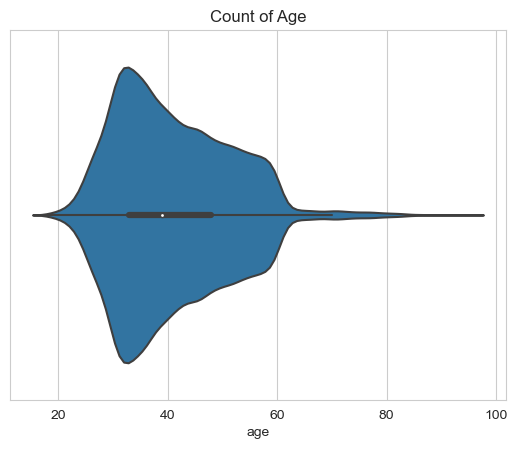

In [73]:
sns.violinplot(x='age',data=Bank_TD_Train)
plt.title('Count of Age')
plt.show

In [74]:
Bank_TD_Train['age'].value_counts()

age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64

MAjority of the age count is from 31 to 35

#### BiVariate Analysis

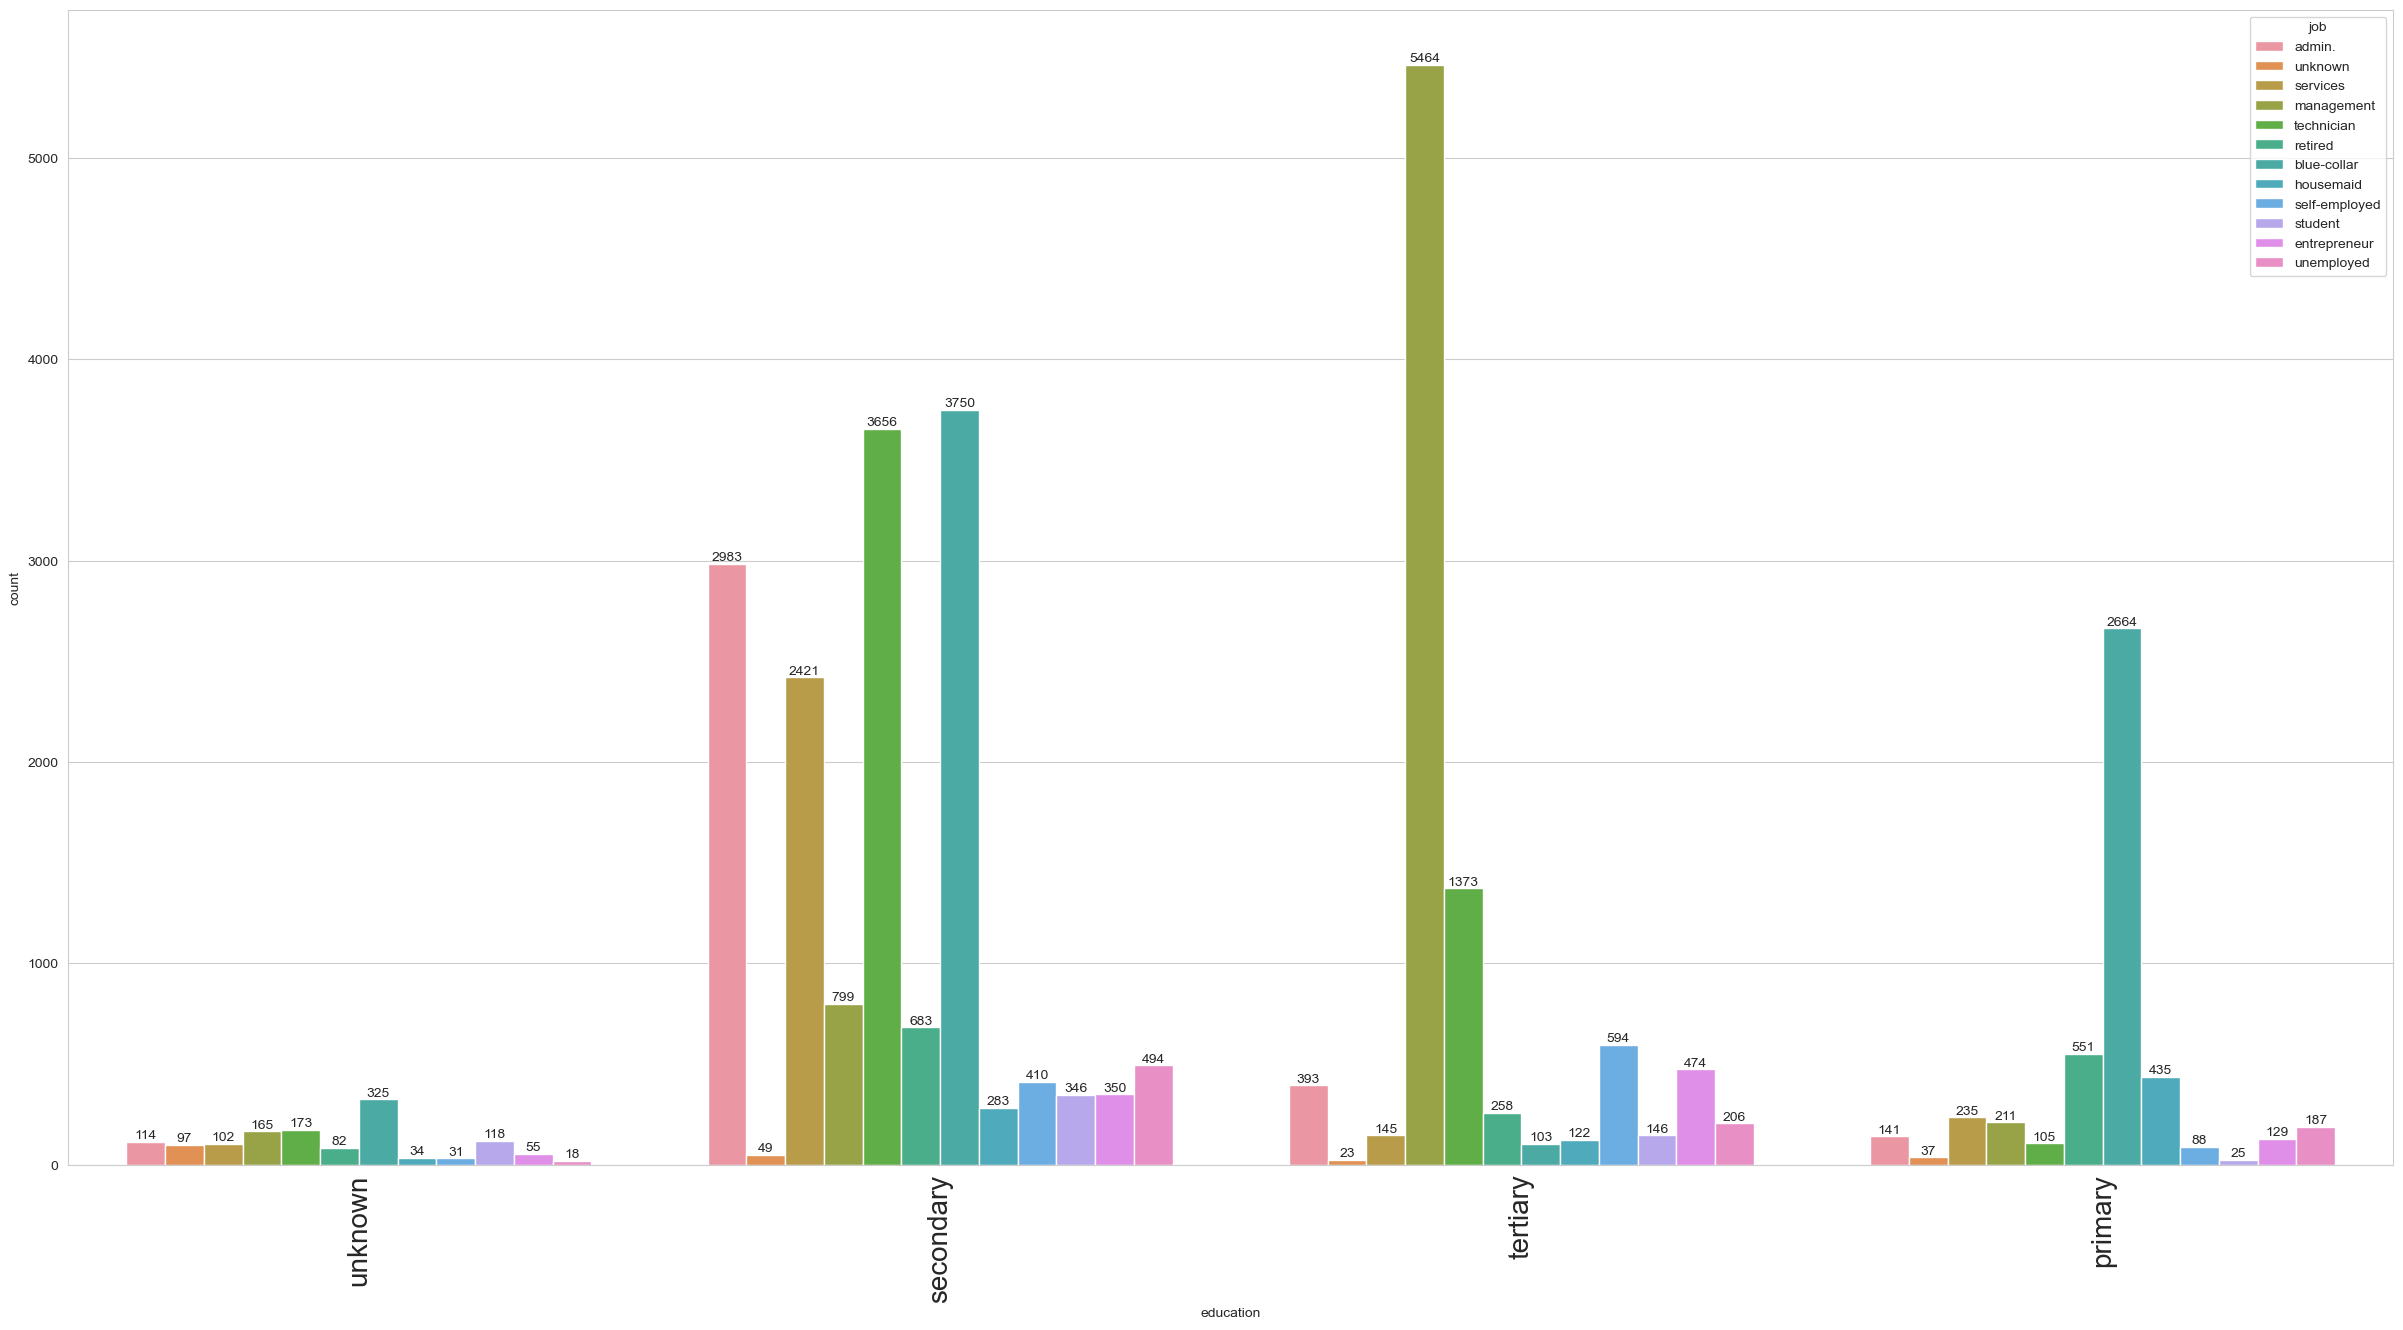

In [75]:
plt.figure(figsize=(30,15))
x=sns.countplot(data=Bank_TD_Train,x="education",hue='job')
plt.xticks(rotation=90,fontsize=20)
for i in x.containers:
    x.bar_label(i)

Education "Tertiary" with Management has the highest count.

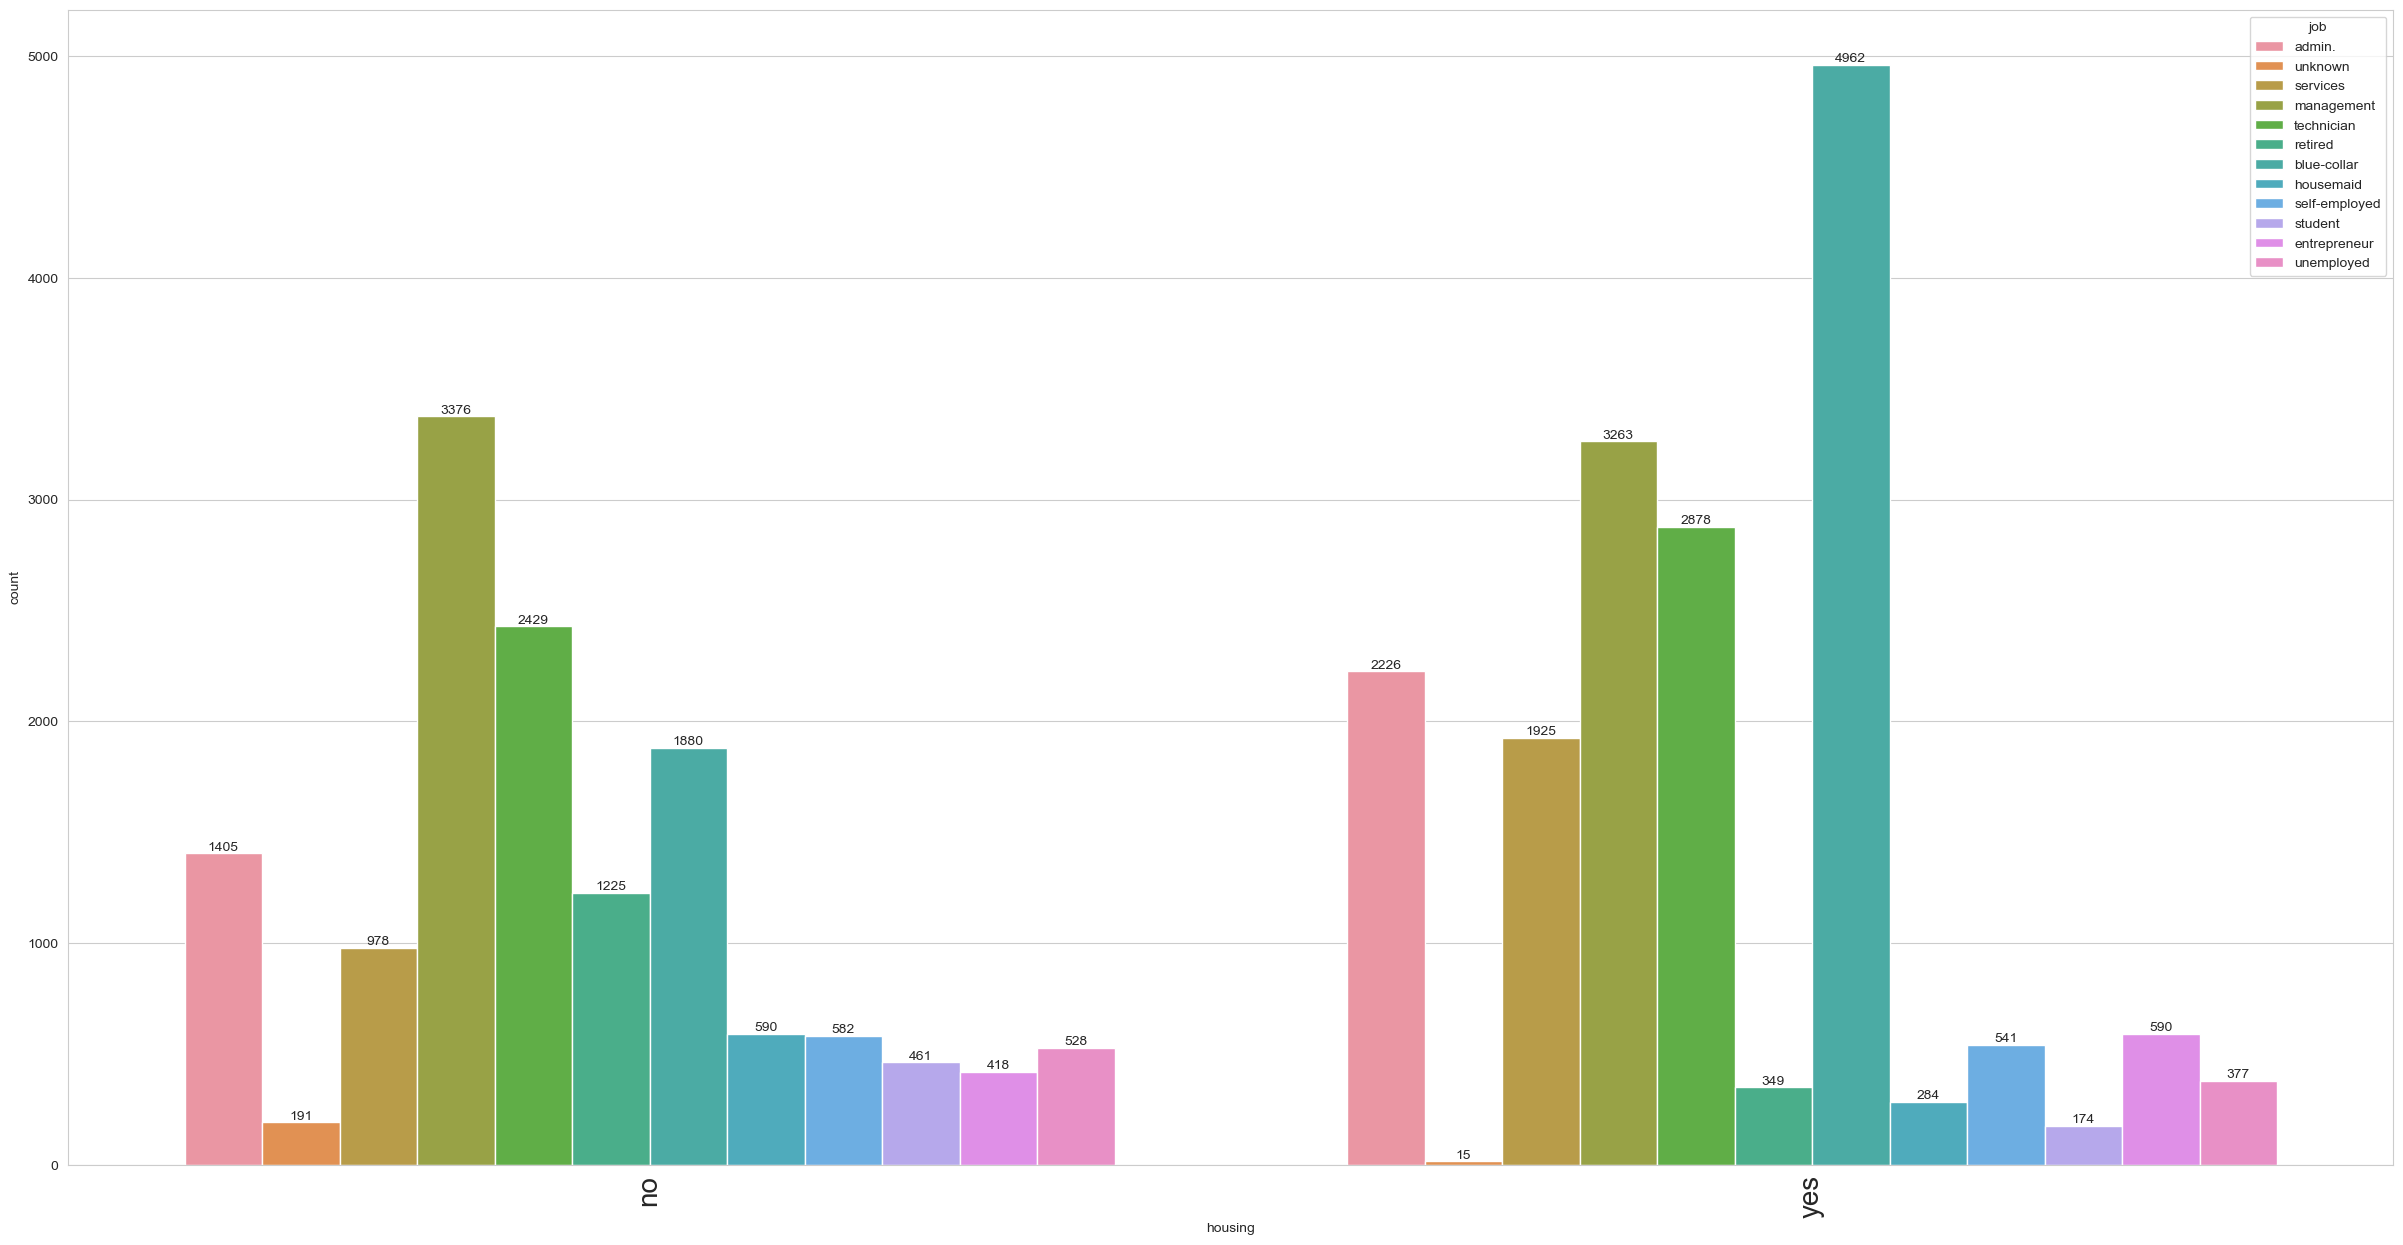

In [76]:
plt.figure(figsize=(30,15))
x=sns.countplot(data=Bank_TD_Train,x="housing",hue='job')
plt.xticks(rotation=90,fontsize=20)
for i in x.containers:
    x.bar_label(i)

Bluecollar has the highest housing loan count when compared to others.

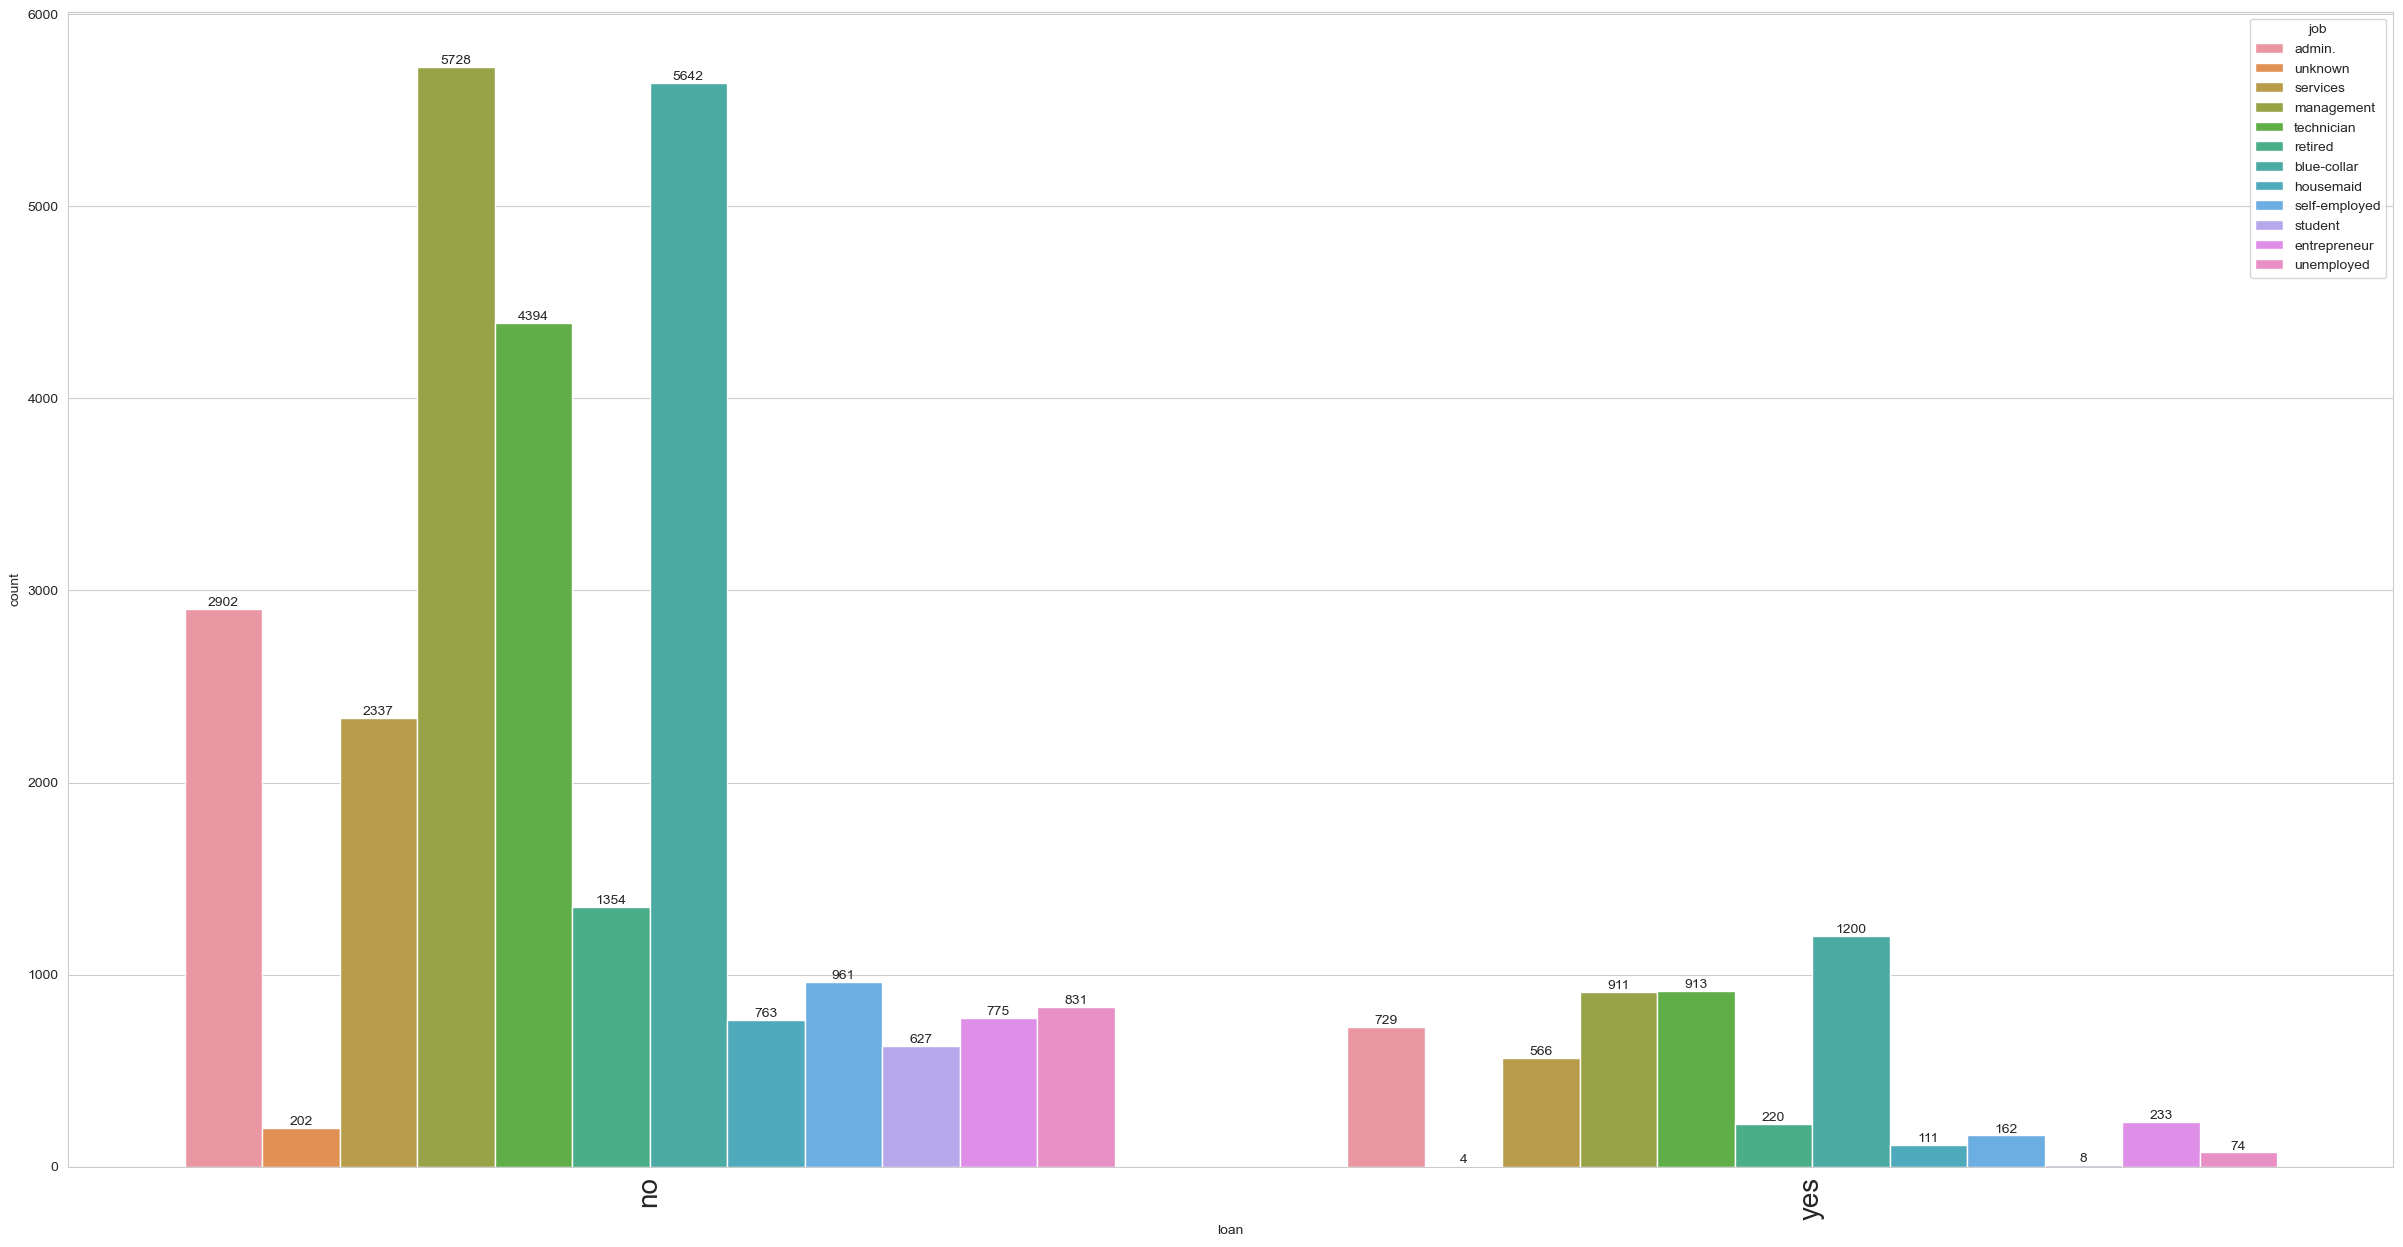

In [77]:
plt.figure(figsize=(30,15))
x=sns.countplot(data=Bank_TD_Train,x="loan",hue='job')
plt.xticks(rotation=90,fontsize=20)
for i in x.containers:
    x.bar_label(i)

Person with personal loan has less count when compareed with no personal loan

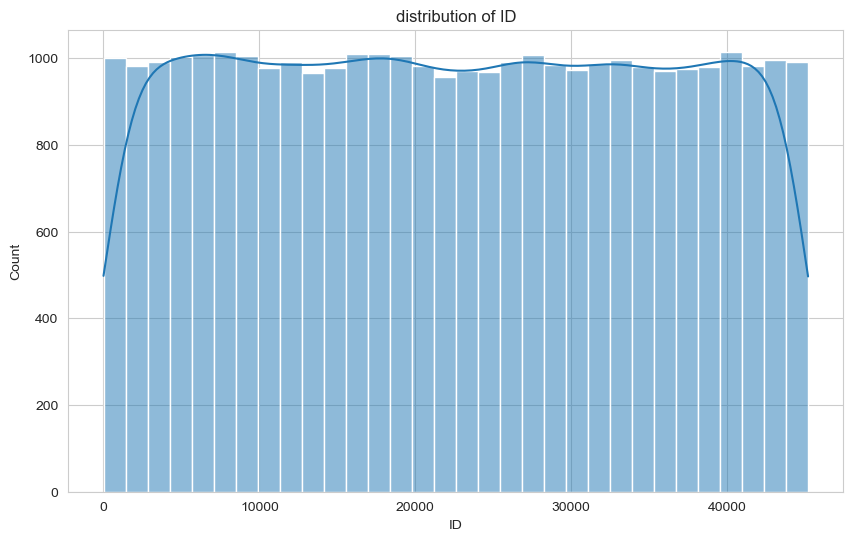

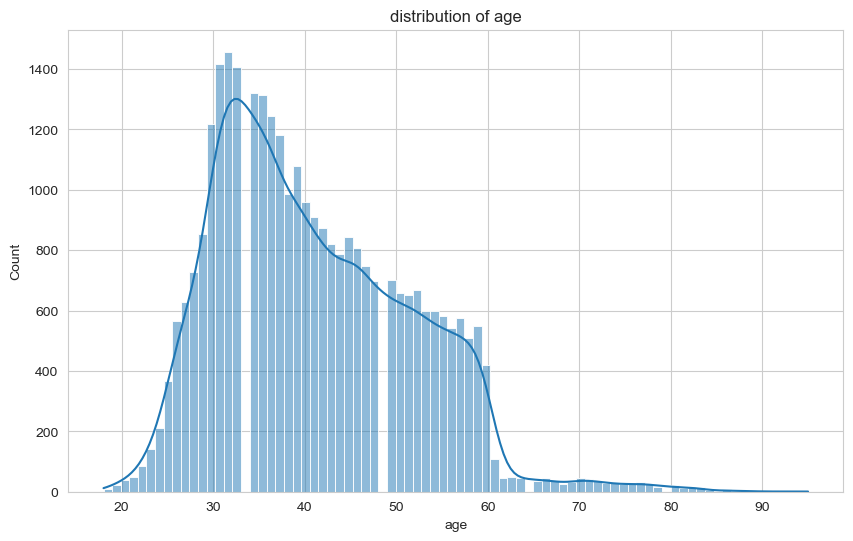

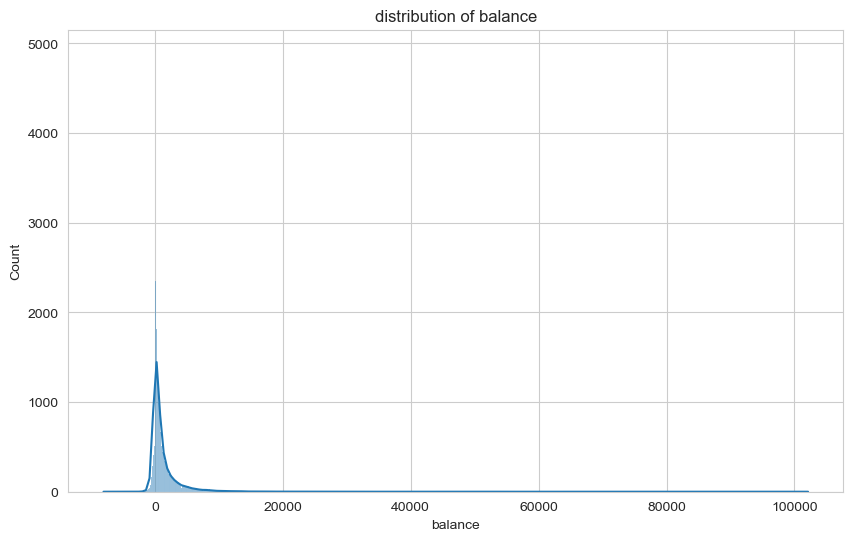

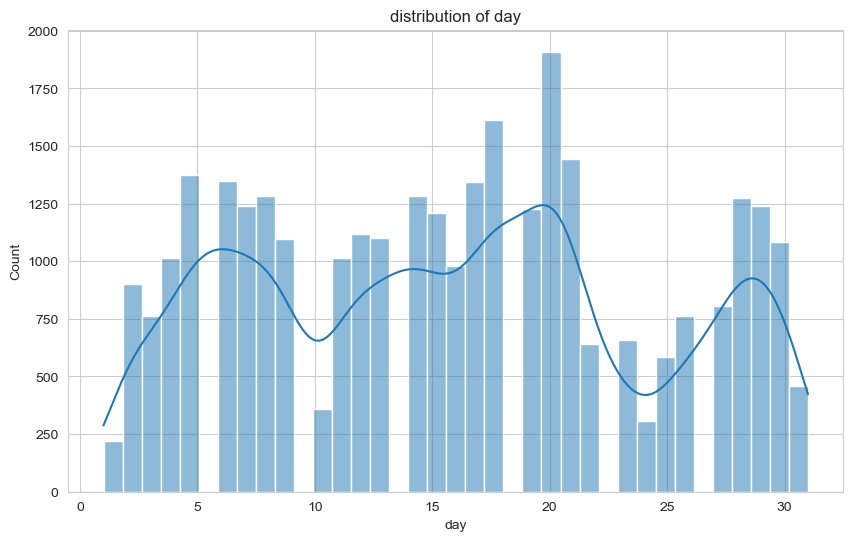

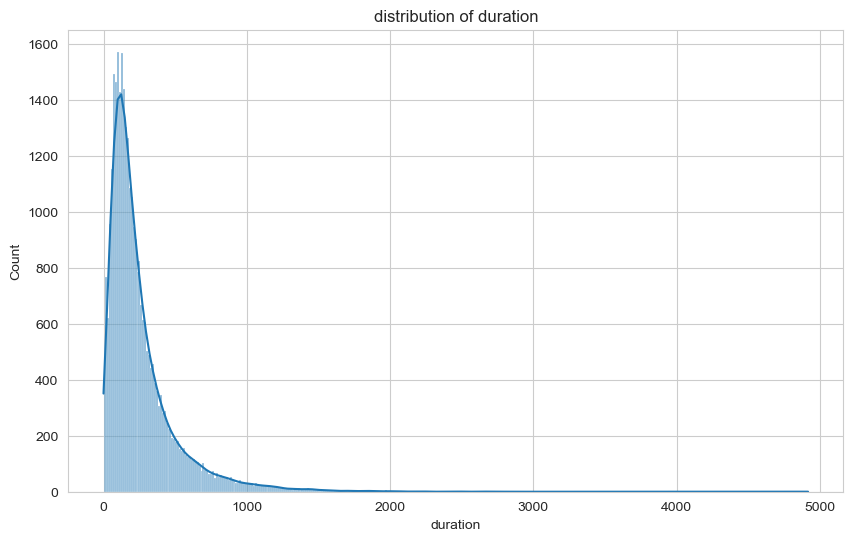

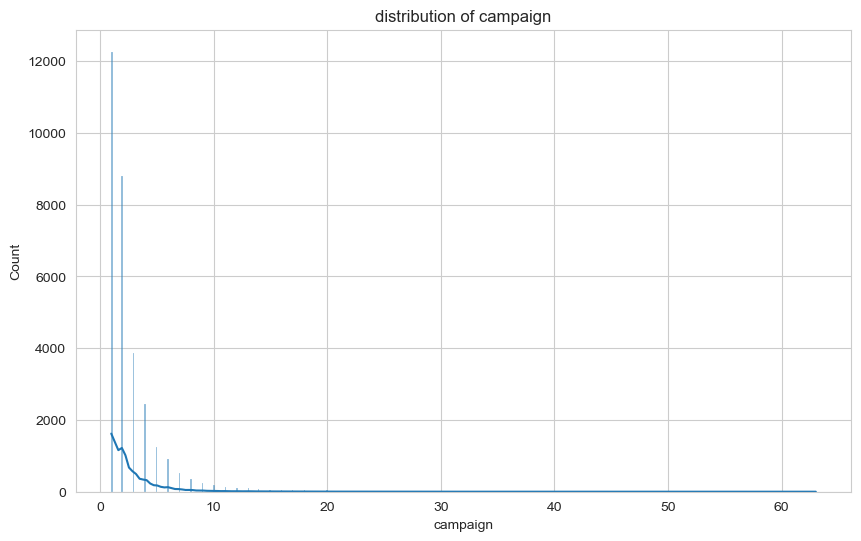

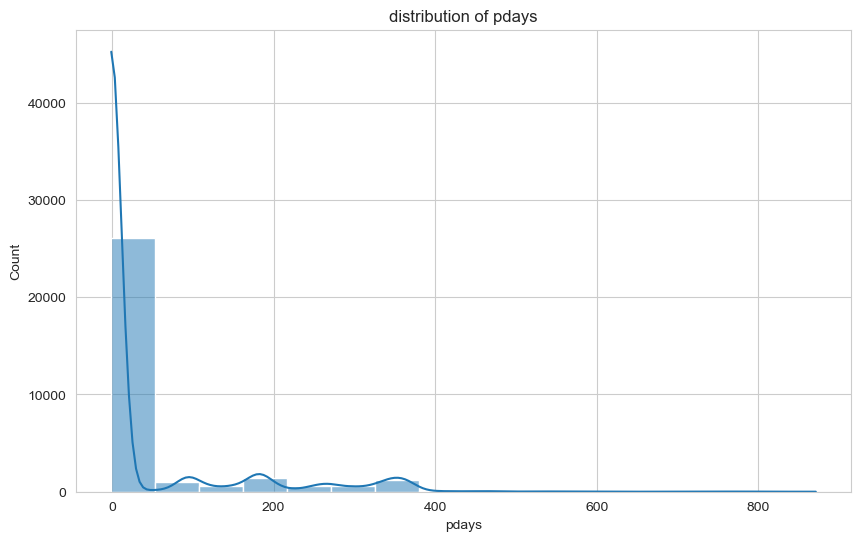

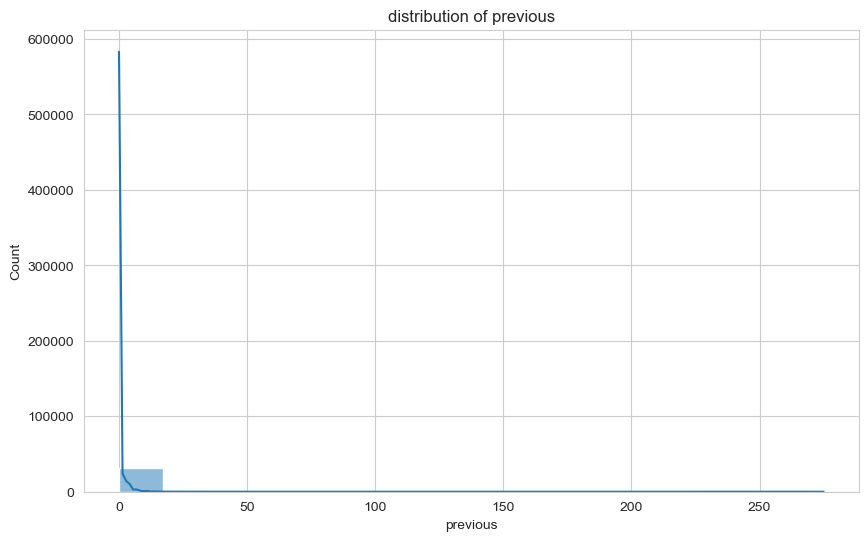

In [78]:
for i in Bank_TD_Train.columns:
    if Bank_TD_Train[i].dtype !="object":
        plt.figure(figsize=(10,6))
        sns.histplot(Bank_TD_Train[i], kde=True)
        plt.title(f"distribution of {i}")

Skewness present in the Age,Balance,duration,campaign,pdays,previous

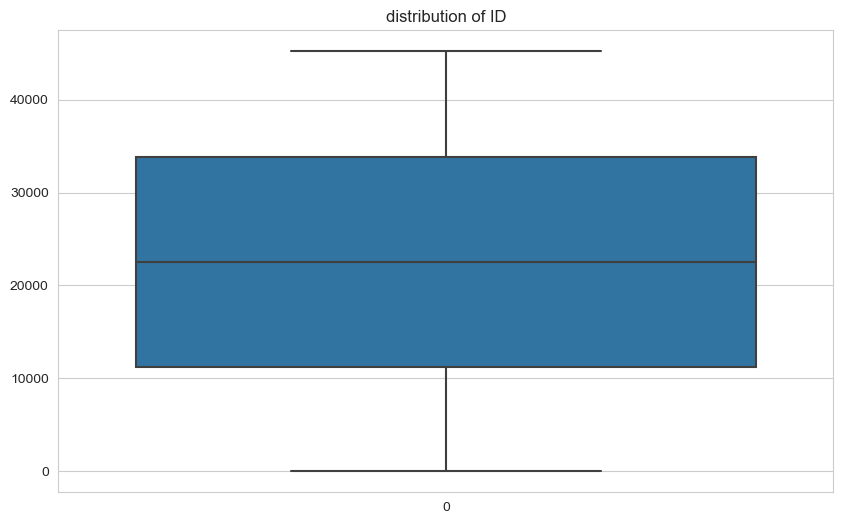

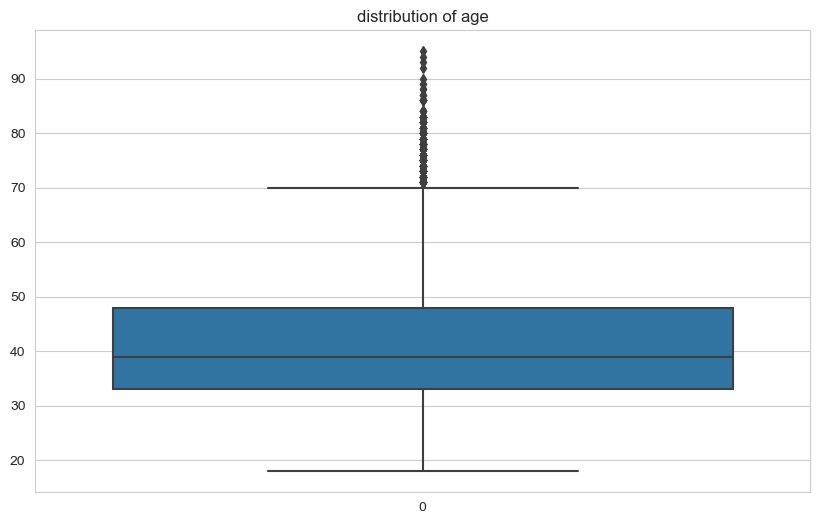

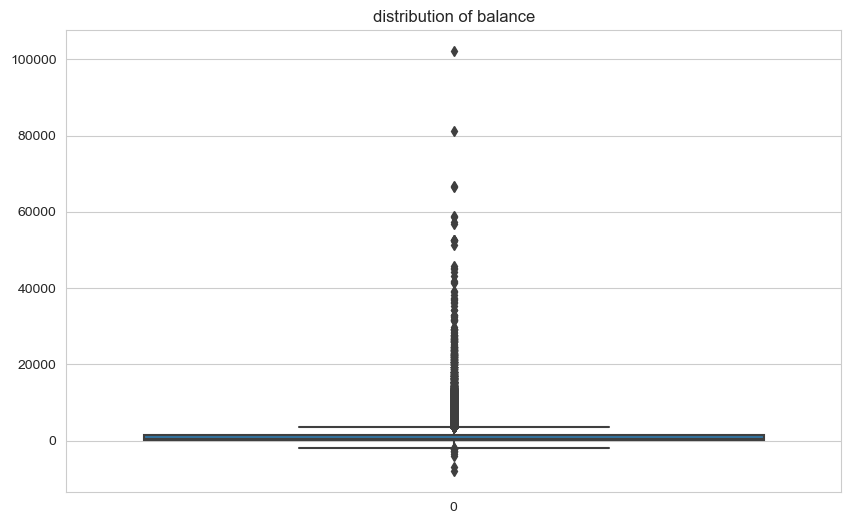

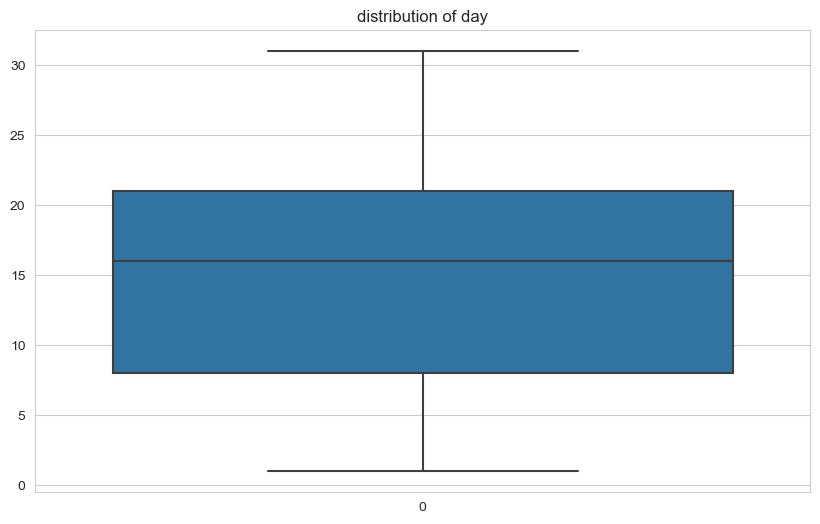

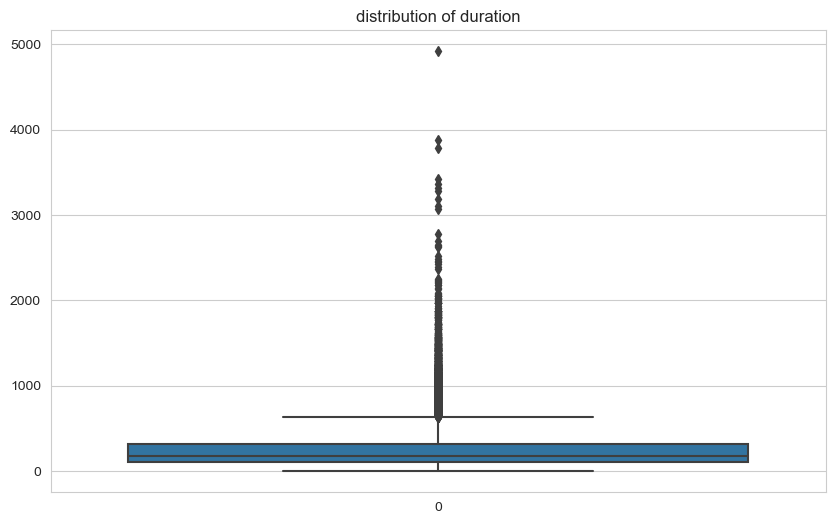

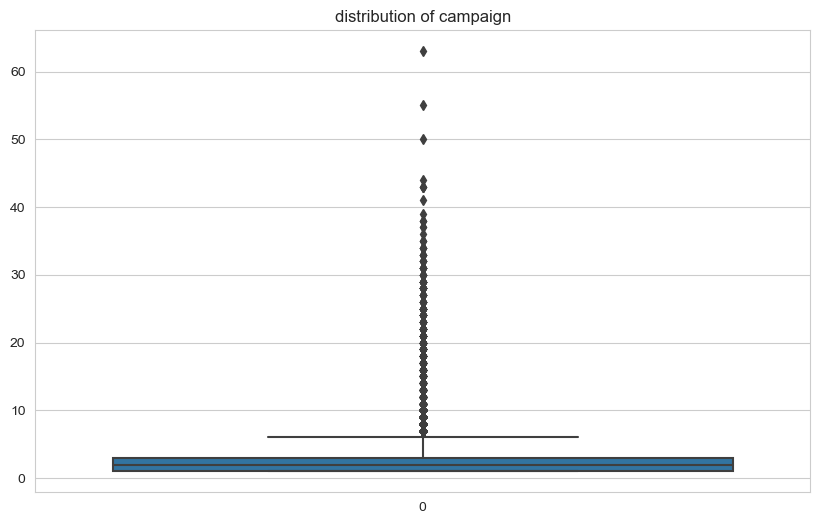

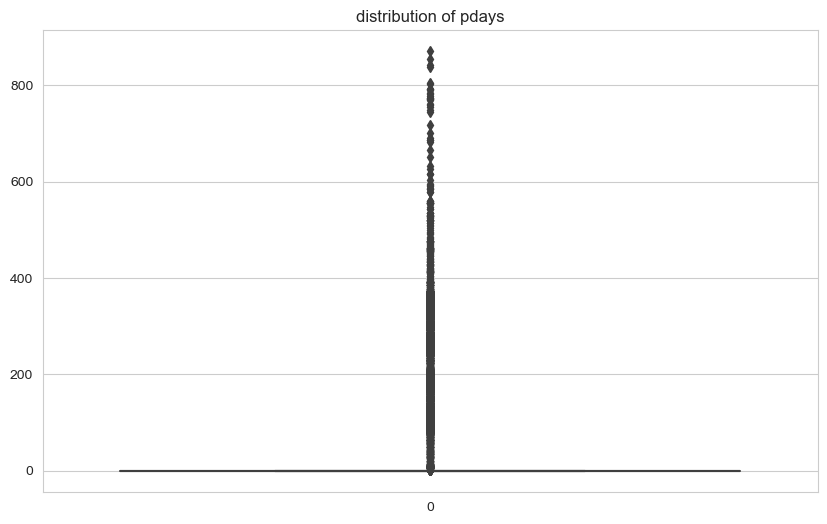

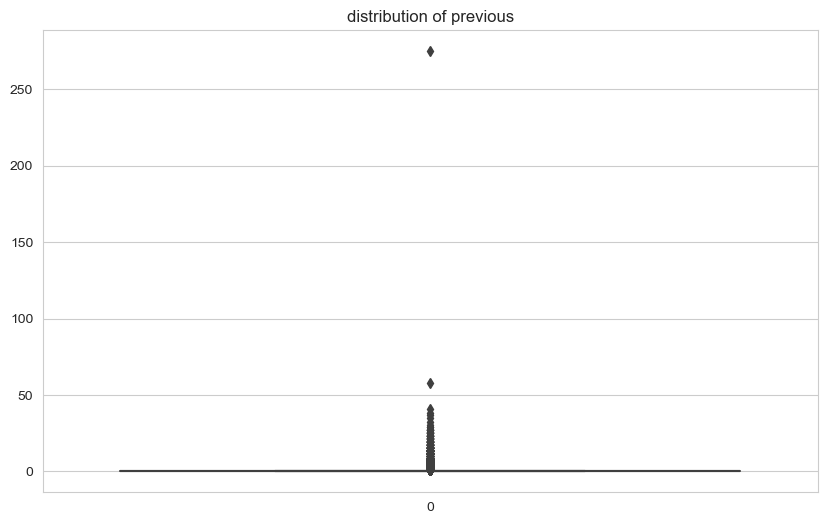

In [79]:
for i in Bank_TD_Train.columns:
    if Bank_TD_Train[i].dtype !="object":
        plt.figure(figsize=(10,6))
        sns.boxplot(Bank_TD_Train[i])
        plt.title(f"distribution of {i}")

We observed Outliers present in the age,balance,duration,campaign,pdays and previous columns as there is a huge difference in the 75% and maximum value.

## Converting Categorical Data into Numerical Data

In [80]:
for i in Bank_TD_Train.columns:
    if Bank_TD_Train[i].dtype =="object":
        le=LabelEncoder()
        Bank_TD_Train[i]=le.fit_transform(Bank_TD_Train[i])


<function matplotlib.pyplot.show(close=None, block=None)>

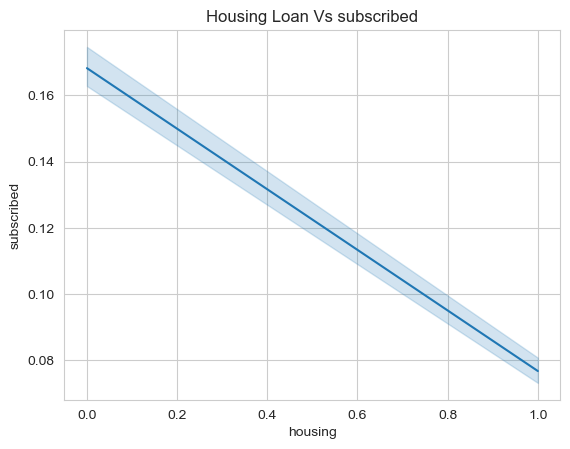

In [81]:
sns.lineplot(x='housing',y='subscribed',data=Bank_TD_Train)
plt.title('Housing Loan Vs subscribed')
plt.show

When person has housing loan, the subscribed rate is less

<function matplotlib.pyplot.show(close=None, block=None)>

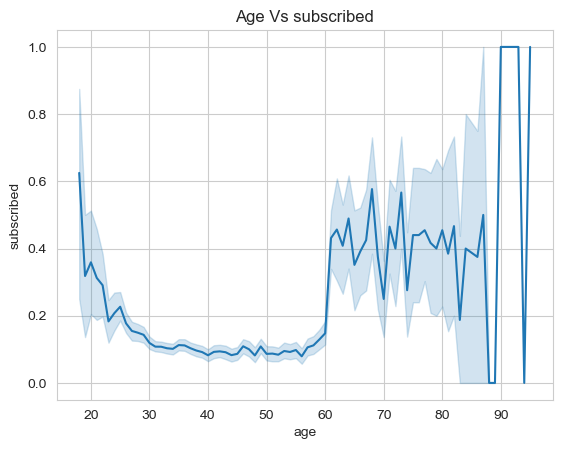

In [82]:
sns.lineplot(x='age',y='subscribed',data=Bank_TD_Train)
plt.title('Age Vs subscribed')
plt.show

People at the age of 60 has high subscribed count

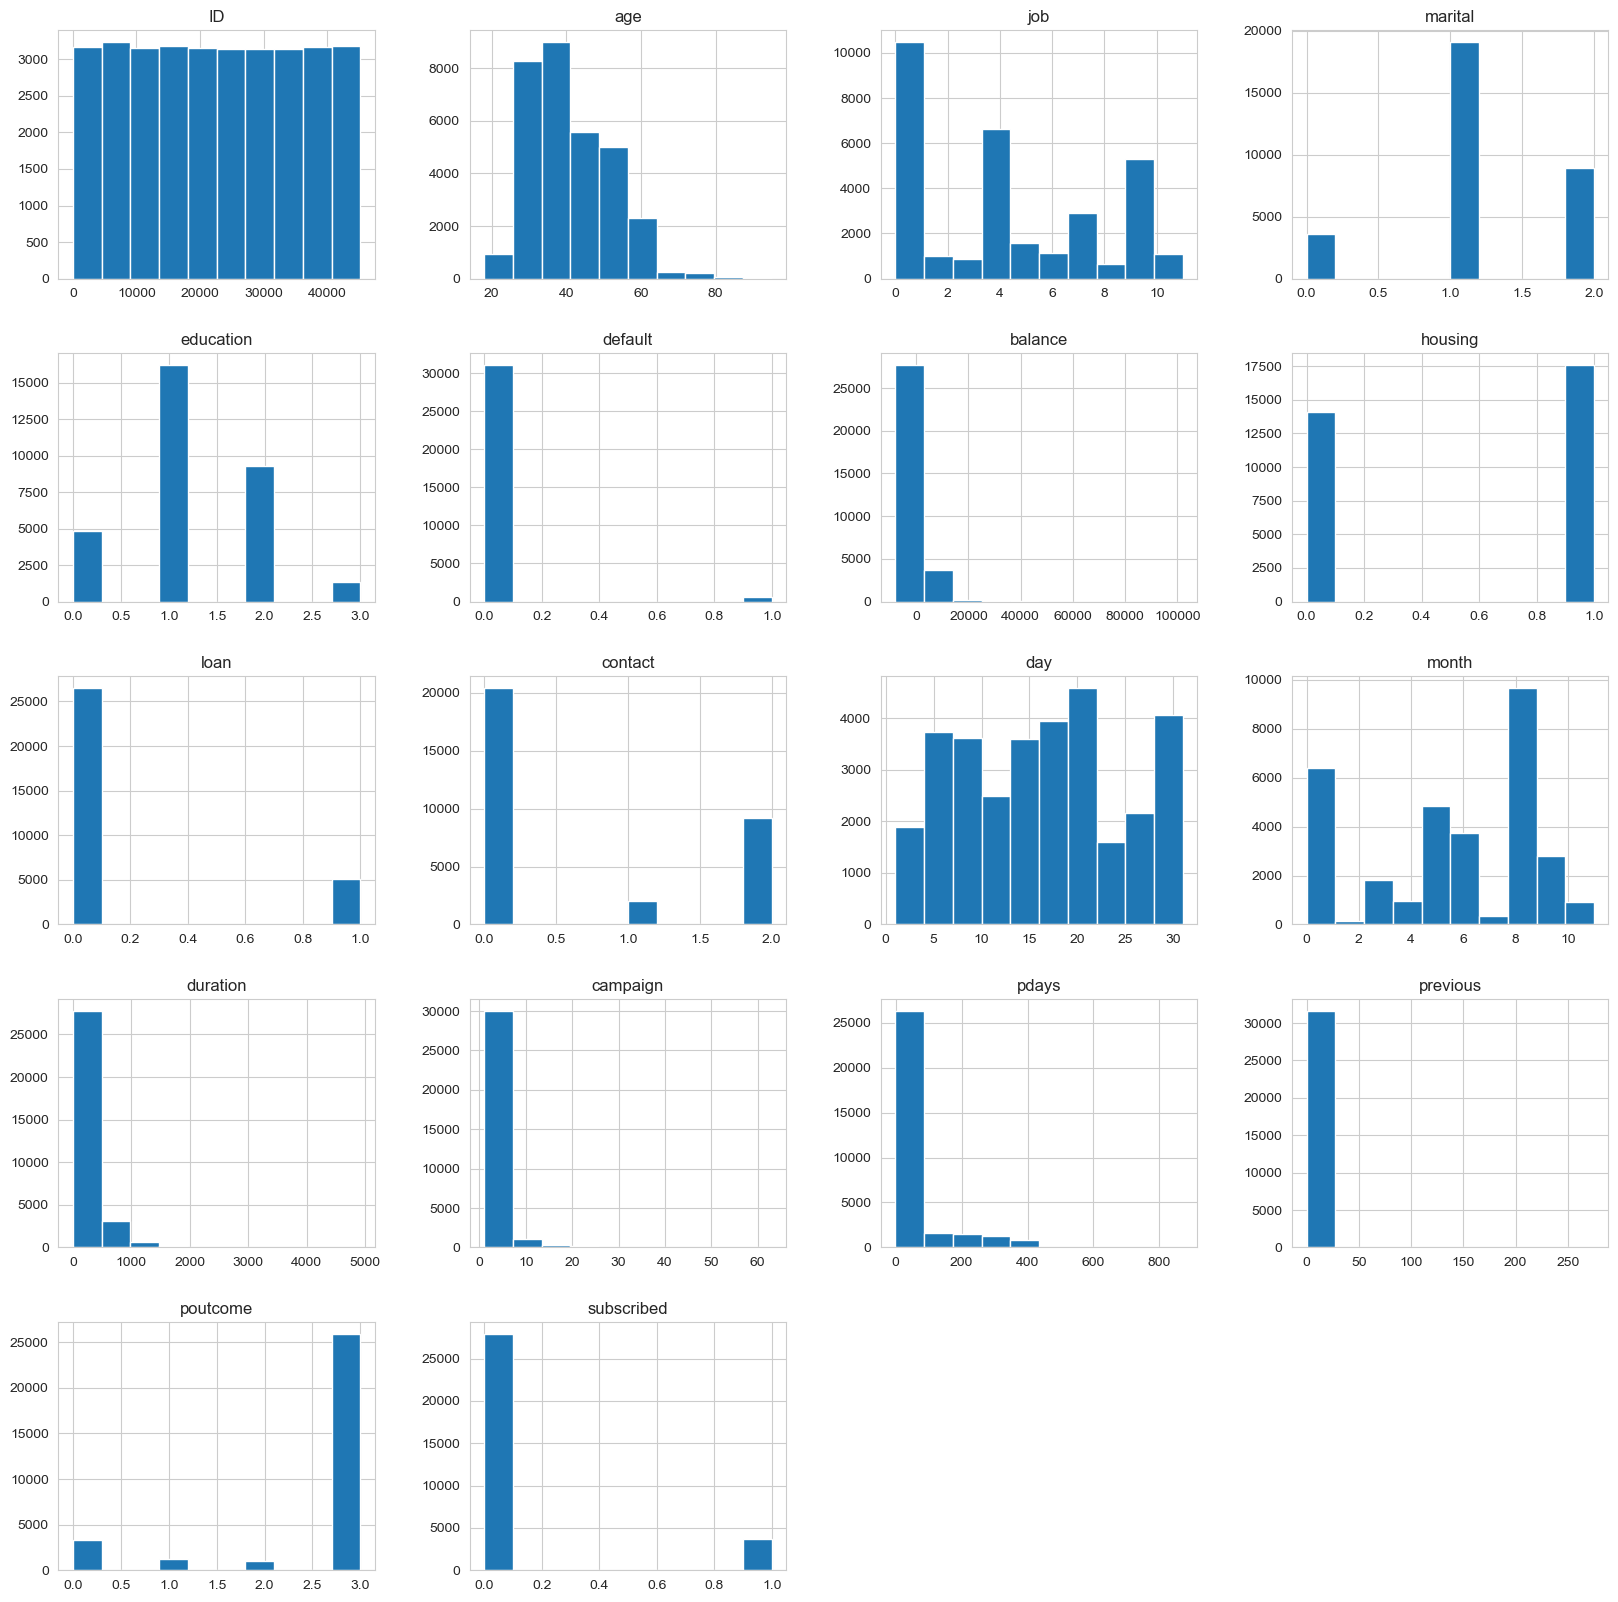

In [83]:
Bank_TD_Train.hist(figsize=(20,20))
plt.show()

<Axes: >

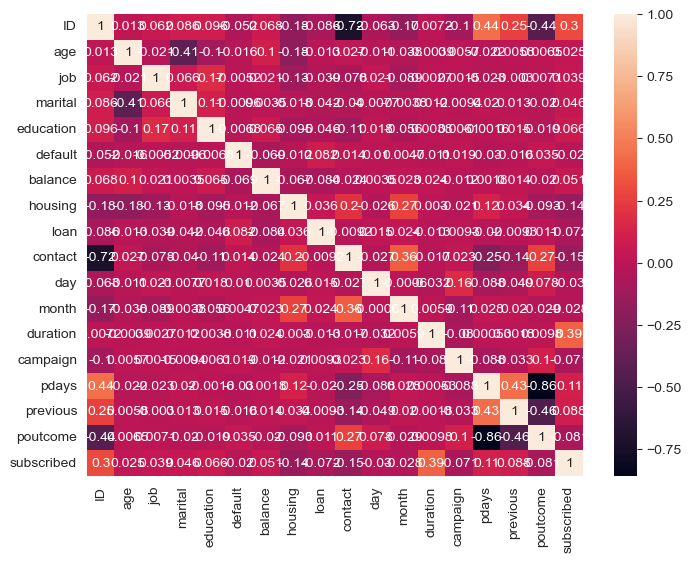

In [84]:
plt.figure(figsize=(8,6))
sns.heatmap(Bank_TD_Train.corr(),annot=True)

In [85]:
from scipy.stats import zscore
z=np.abs(zscore(Bank_TD_Train))
threshold=3
np.where(z>3)
Bank_TD_Train=Bank_TD_Train[(z<3).all(axis=1)]
Bank_TD_Train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3,0
31641,9476,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1


In [86]:
x=Bank_TD_Train.drop(['subscribed'],axis=1)
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3
31641,9476,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3


In [87]:
y=Bank_TD_Train.iloc[:,-1]
y

0        0
1        0
2        0
3        1
4        0
        ..
31640    0
31641    0
31642    0
31643    1
31644    0
Name: subscribed, Length: 27584, dtype: int32

In [88]:
from imblearn.over_sampling import SMOTE
target = SMOTE()
x,y= target.fit_resample(x,y)

In [89]:
y.value_counts()

subscribed
0    24762
1    24762
Name: count, dtype: int64

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [91]:
Lg=LogisticRegression()
dtc=DecisionTreeClassifier(criterion='entropy')
gnb=GaussianNB()
ada = AdaBoostClassifier()
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
gb = GradientBoostingClassifier()

model=(Lg,dtc,gnb,ada,rfc,gb)
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Accuracy Score of',m,)
    print(accuracy_score(y_test,predict))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))

Accuracy Score of LogisticRegression()
0.7915194346289752
[[3603 1263]
 [ 802 4237]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      4866
           1       0.77      0.84      0.80      5039

    accuracy                           0.79      9905
   macro avg       0.79      0.79      0.79      9905
weighted avg       0.79      0.79      0.79      9905

Accuracy Score of DecisionTreeClassifier(criterion='entropy')
0.9203432609793034
[[4395  471]
 [ 318 4721]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      4866
           1       0.91      0.94      0.92      5039

    accuracy                           0.92      9905
   macro avg       0.92      0.92      0.92      9905
weighted avg       0.92      0.92      0.92      9905

Accuracy Score of GaussianNB()
0.8058556284704694
[[3552 1314]
 [ 609 4430]]
              precision    recall  f1-score   support

           0       0.

The Model "Random Forest Classifier " works best with Accuracy score of 0.947804139323574.

Not Subscribed-4866
Subscribed -5039

## Saving Best Model

In [102]:
import joblib
joblib.dump(rfc,'rfcfile_bnpd.obj')#Serialization
dtc_from_joblib=joblib.load('rfcfile_bnpd.obj')
dtc_from_joblib.predict(x_test)


array([1, 1, 1, ..., 1, 0, 1])

### Testing Data

In [103]:
Bank_TD_Test=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")
Bank_TD_Test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


There are 8 numerical data and 8 categorical data present in the Training dataset.

Id, Age,Balance,Day,Duration,Campaign,pdays,previous -Numerical Data Job,Marital,Education,Default,Housing,Loan,Contact,Month,poutcome-Categorical data

In [104]:
Bank_TD_Test.shape

(13564, 17)

The testing data has 13564 rows and 17 columns

In [105]:
Bank_TD_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [106]:
Bank_TD_Test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [107]:
Bank_TD_Test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

There are no null values in the testing data.

## Exploratory Data Analysis

##### Univariate

<function matplotlib.pyplot.show(close=None, block=None)>

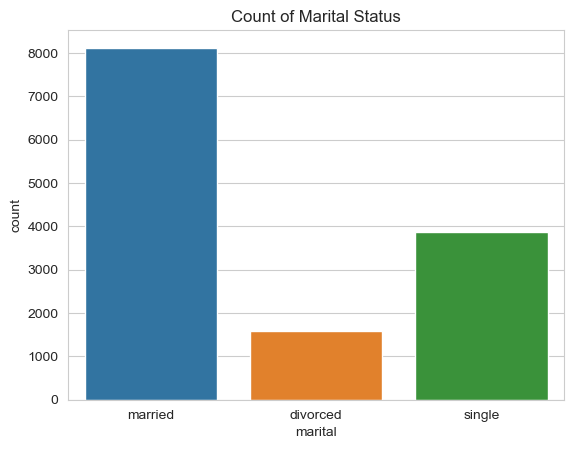

In [108]:
sns.set_style('whitegrid')
sns.countplot(x='marital',data=Bank_TD_Test)
plt.title('Count of Marital Status')
plt.show

In [109]:
Bank_TD_Test['marital'].value_counts()

marital
married     8119
single      3868
divorced    1577
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

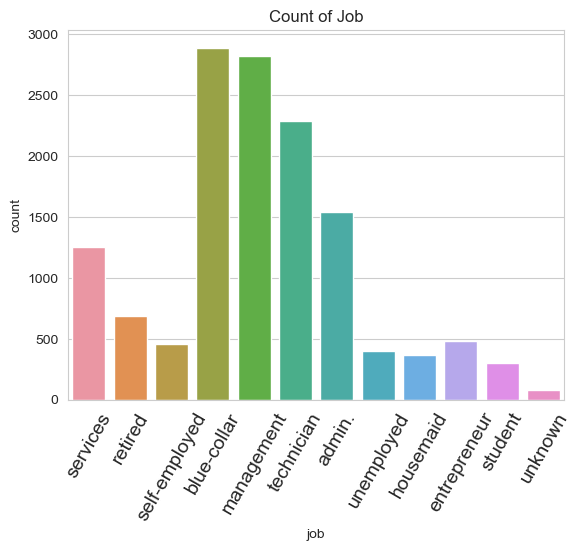

In [110]:
sns.set_style('whitegrid')
sns.countplot(x='job',data=Bank_TD_Test)
plt.xticks(rotation=60,fontsize=14)
plt.title('Count of Job')
plt.show

In [111]:
Bank_TD_Test['job'].value_counts()

job
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

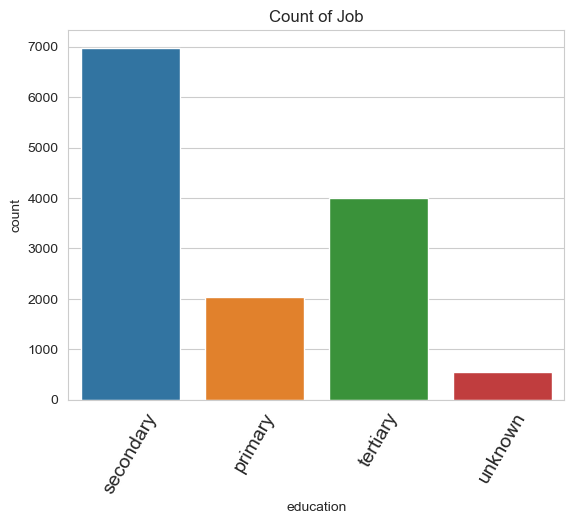

In [112]:
sns.set_style('whitegrid')
sns.countplot(x='education',data=Bank_TD_Test)
plt.xticks(rotation=60,fontsize=14)
plt.title('Count of Job')
plt.show

In [113]:
Bank_TD_Test['education'].value_counts()

education
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

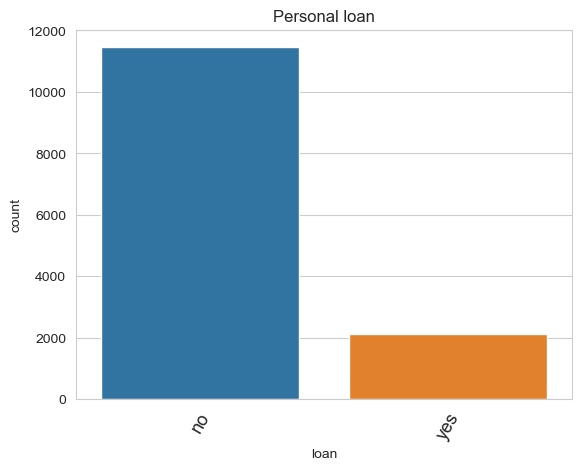

In [114]:
sns.set_style('whitegrid')
sns.countplot(x='loan',data=Bank_TD_Test)
plt.xticks(rotation=60,fontsize=13)
plt.title('Personal loan')
plt.show

In [115]:
Bank_TD_Test['loan'].value_counts()

loan
no     11451
yes     2113
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

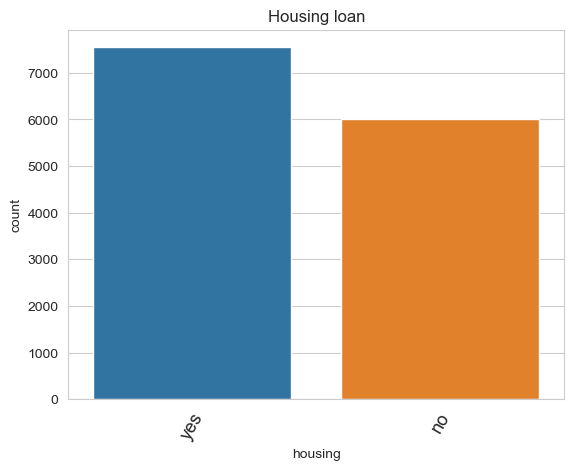

In [116]:
sns.set_style('whitegrid')
sns.countplot(x='housing',data=Bank_TD_Test)
plt.xticks(rotation=60,fontsize=13)
plt.title('Housing loan')
plt.show

In [117]:
Bank_TD_Test['housing'].value_counts()

housing
yes    7546
no     6018
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

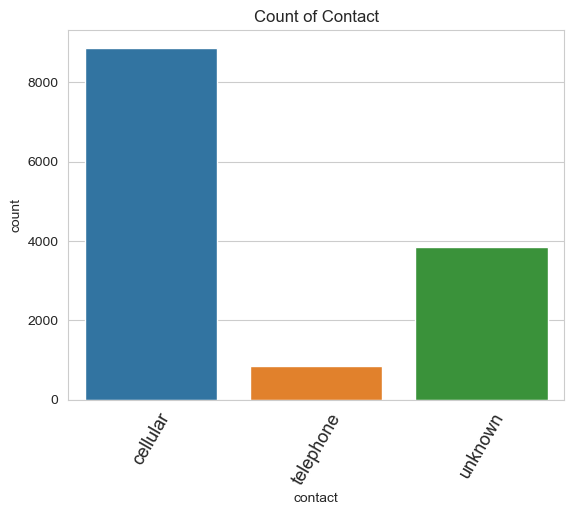

In [118]:
sns.set_style('whitegrid')
sns.countplot(x='contact',data=Bank_TD_Test)
plt.xticks(rotation=60,fontsize=13)
plt.title('Count of Contact')
plt.show

In [119]:
Bank_TD_Test['contact'].value_counts()

contact
cellular     8862
unknown      3843
telephone     859
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

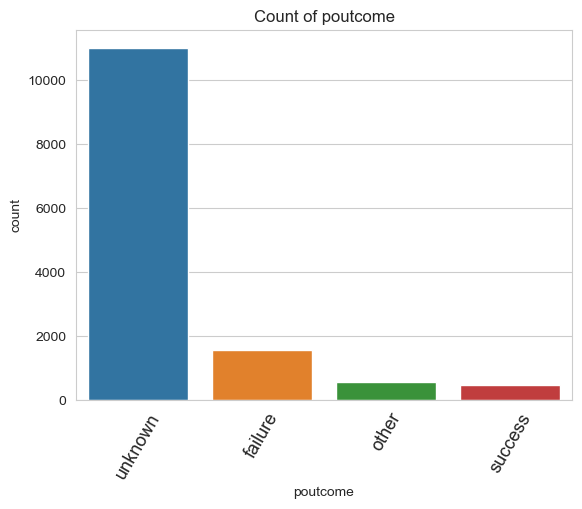

In [120]:
sns.set_style('whitegrid')
sns.countplot(x='poutcome',data=Bank_TD_Test)
plt.xticks(rotation=60,fontsize=13)
plt.title('Count of poutcome')
plt.show

In [121]:
Bank_TD_Test['poutcome'].value_counts()

poutcome
unknown    11030
failure     1539
other        552
success      443
Name: count, dtype: int64

## BiVariate Analysis

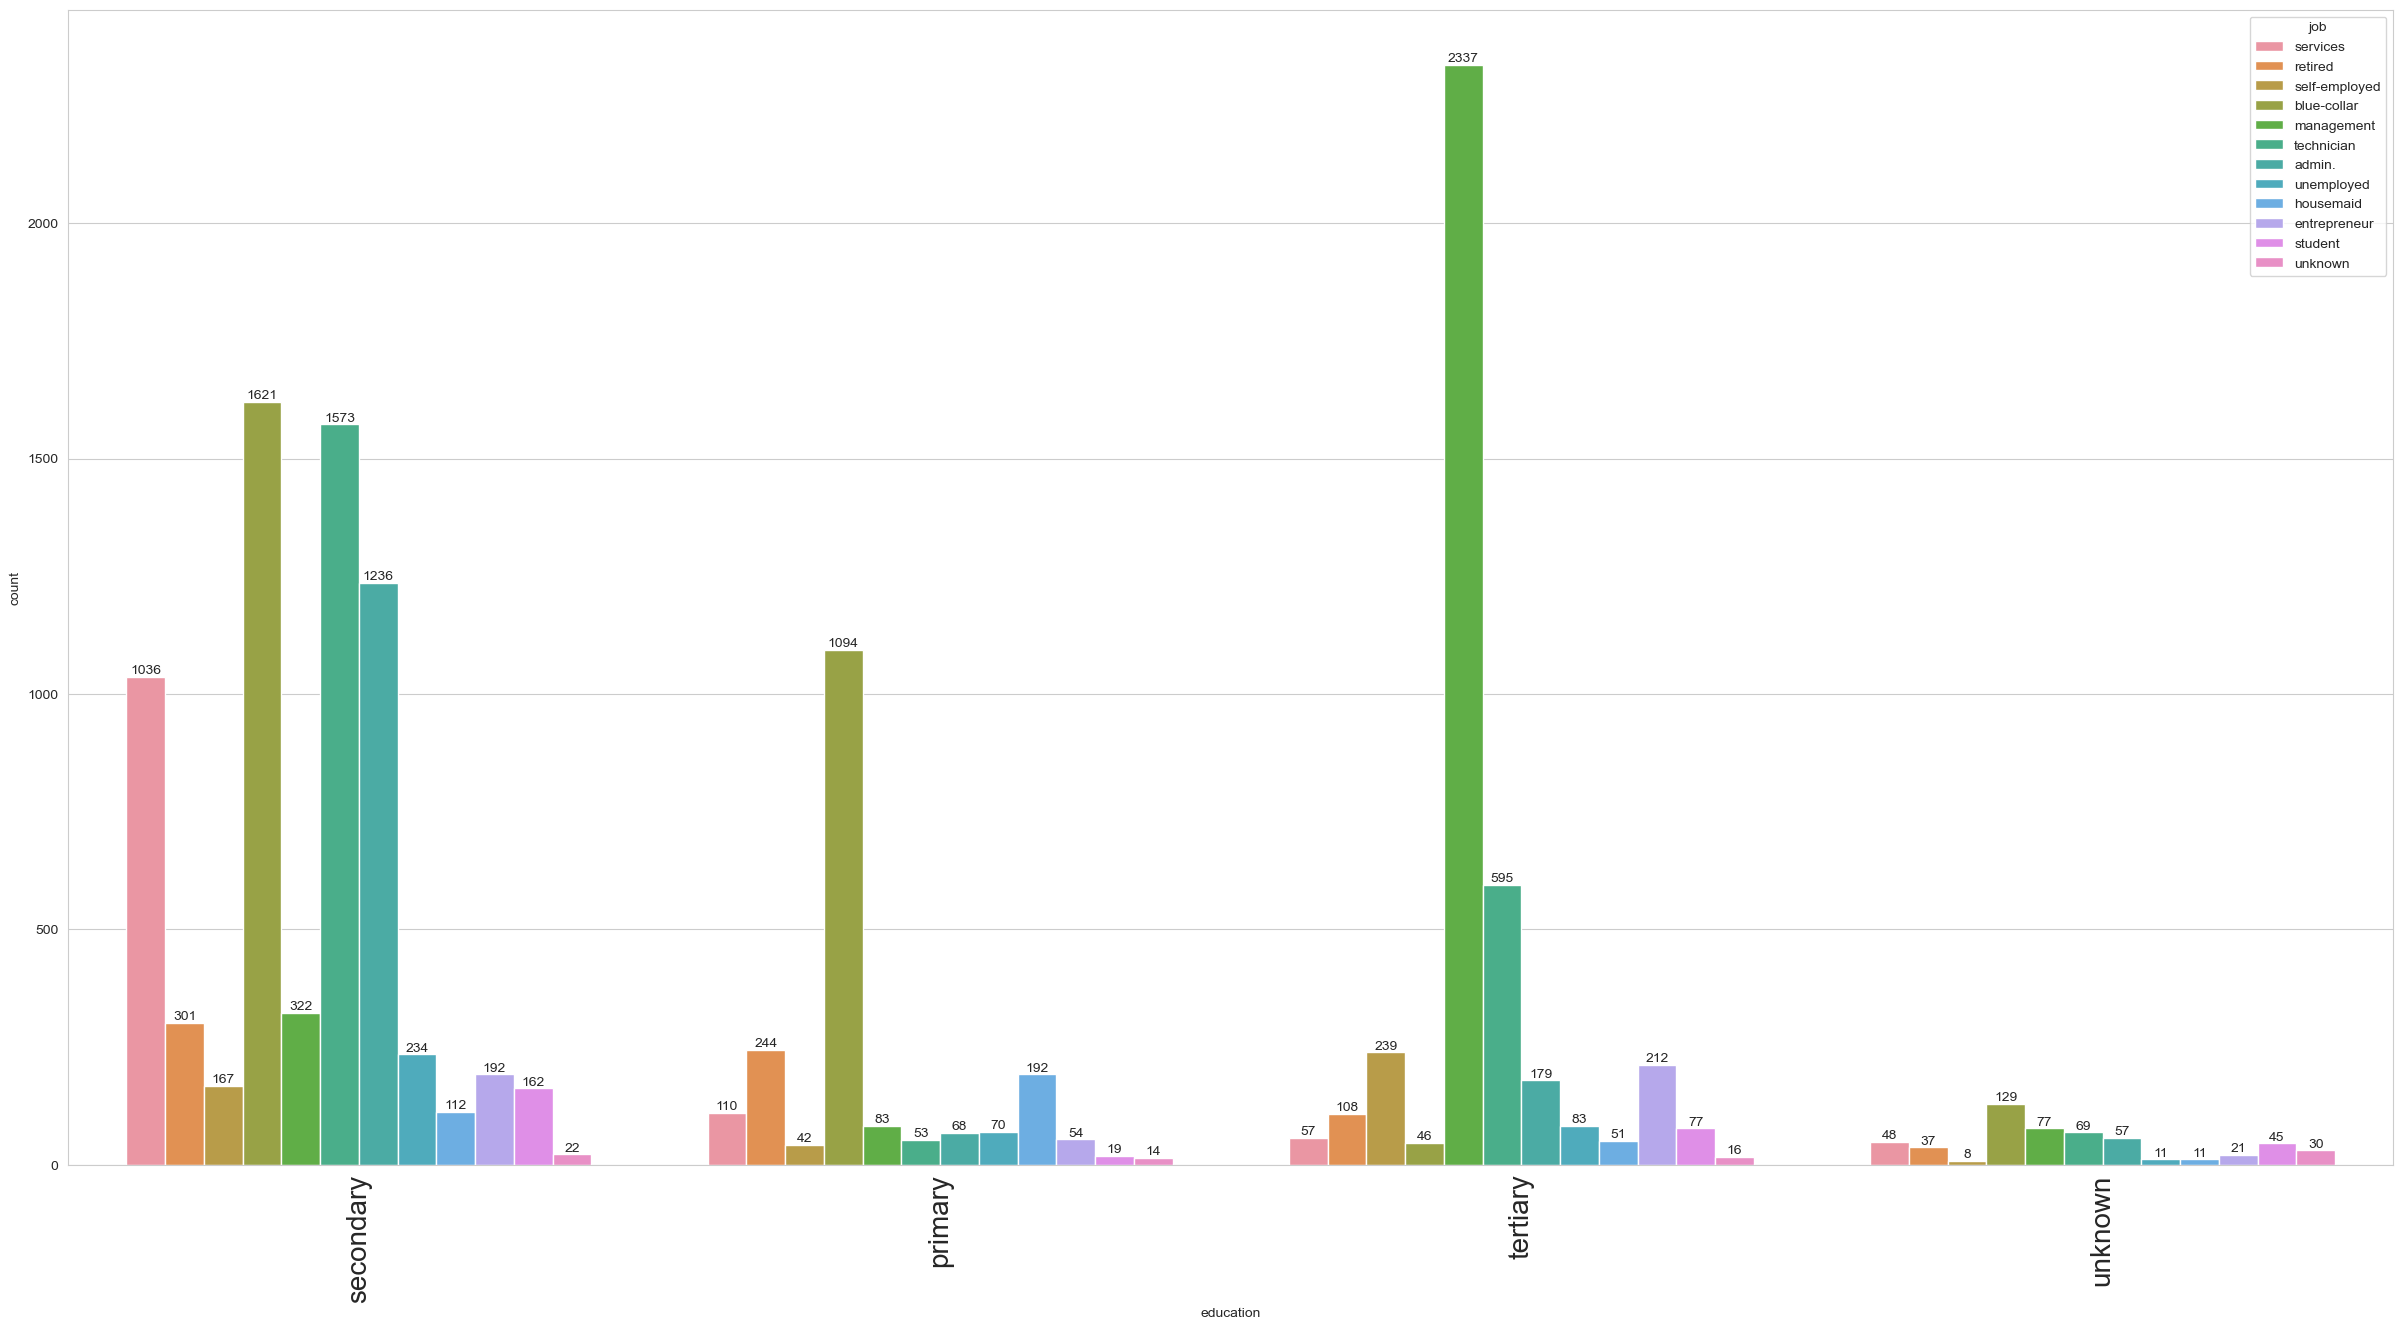

In [122]:
plt.figure(figsize=(30,15))
x=sns.countplot(data=Bank_TD_Test,x="education",hue='job')
plt.xticks(rotation=90,fontsize=20)
for i in x.containers:
    x.bar_label(i)

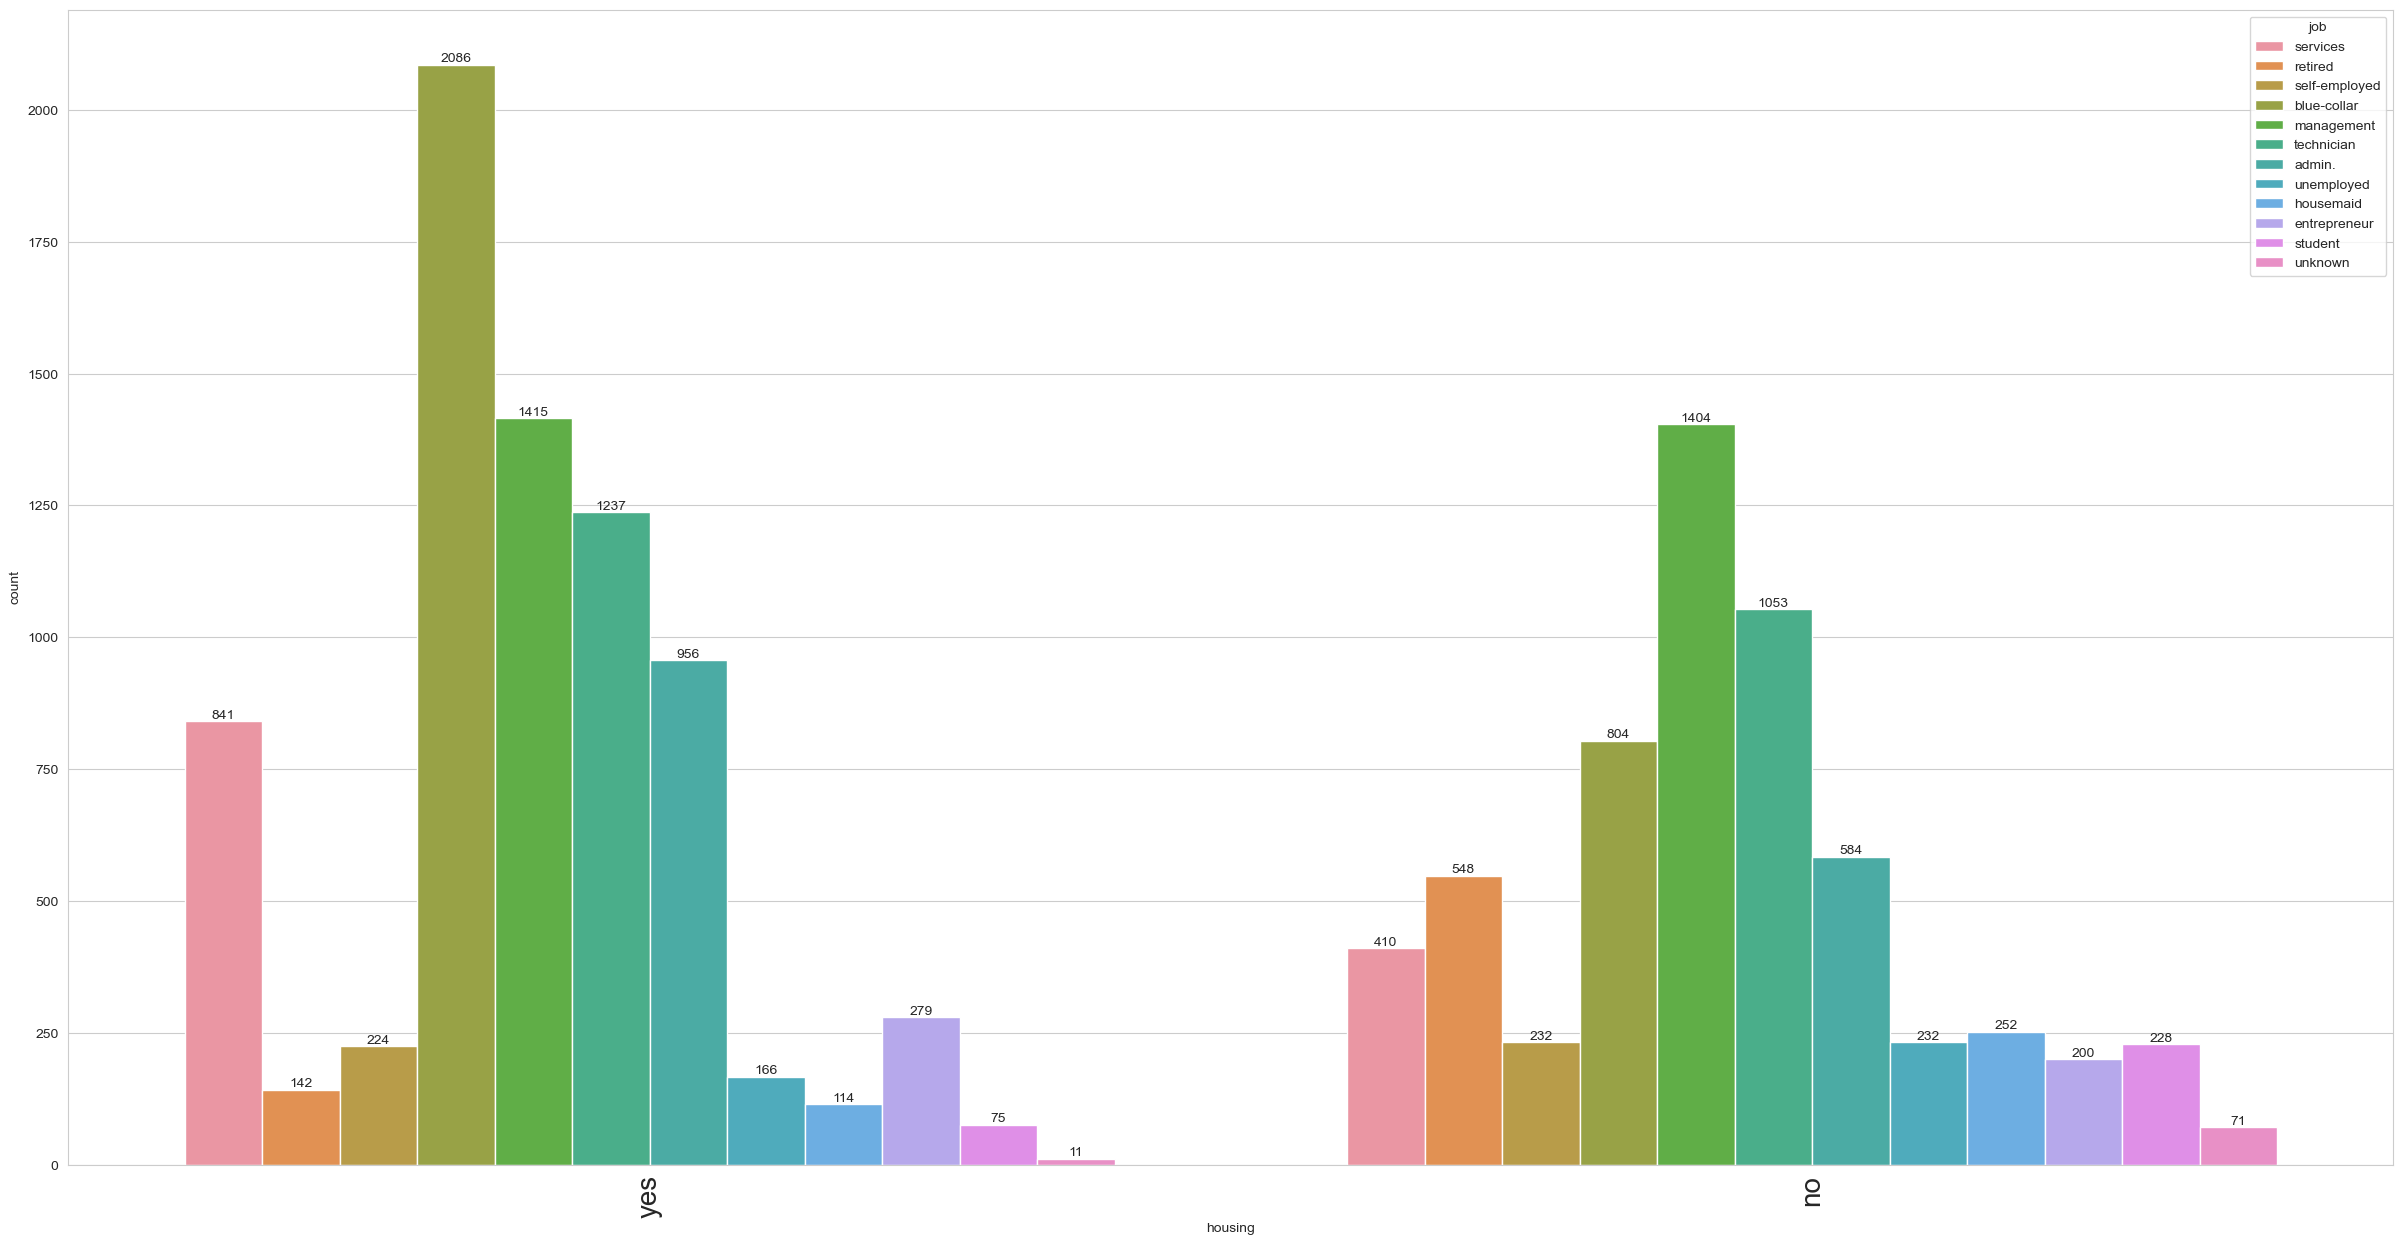

In [123]:
plt.figure(figsize=(30,15))
x=sns.countplot(data=Bank_TD_Test,x="housing",hue='job')
plt.xticks(rotation=90,fontsize=20)
for i in x.containers:
    x.bar_label(i)

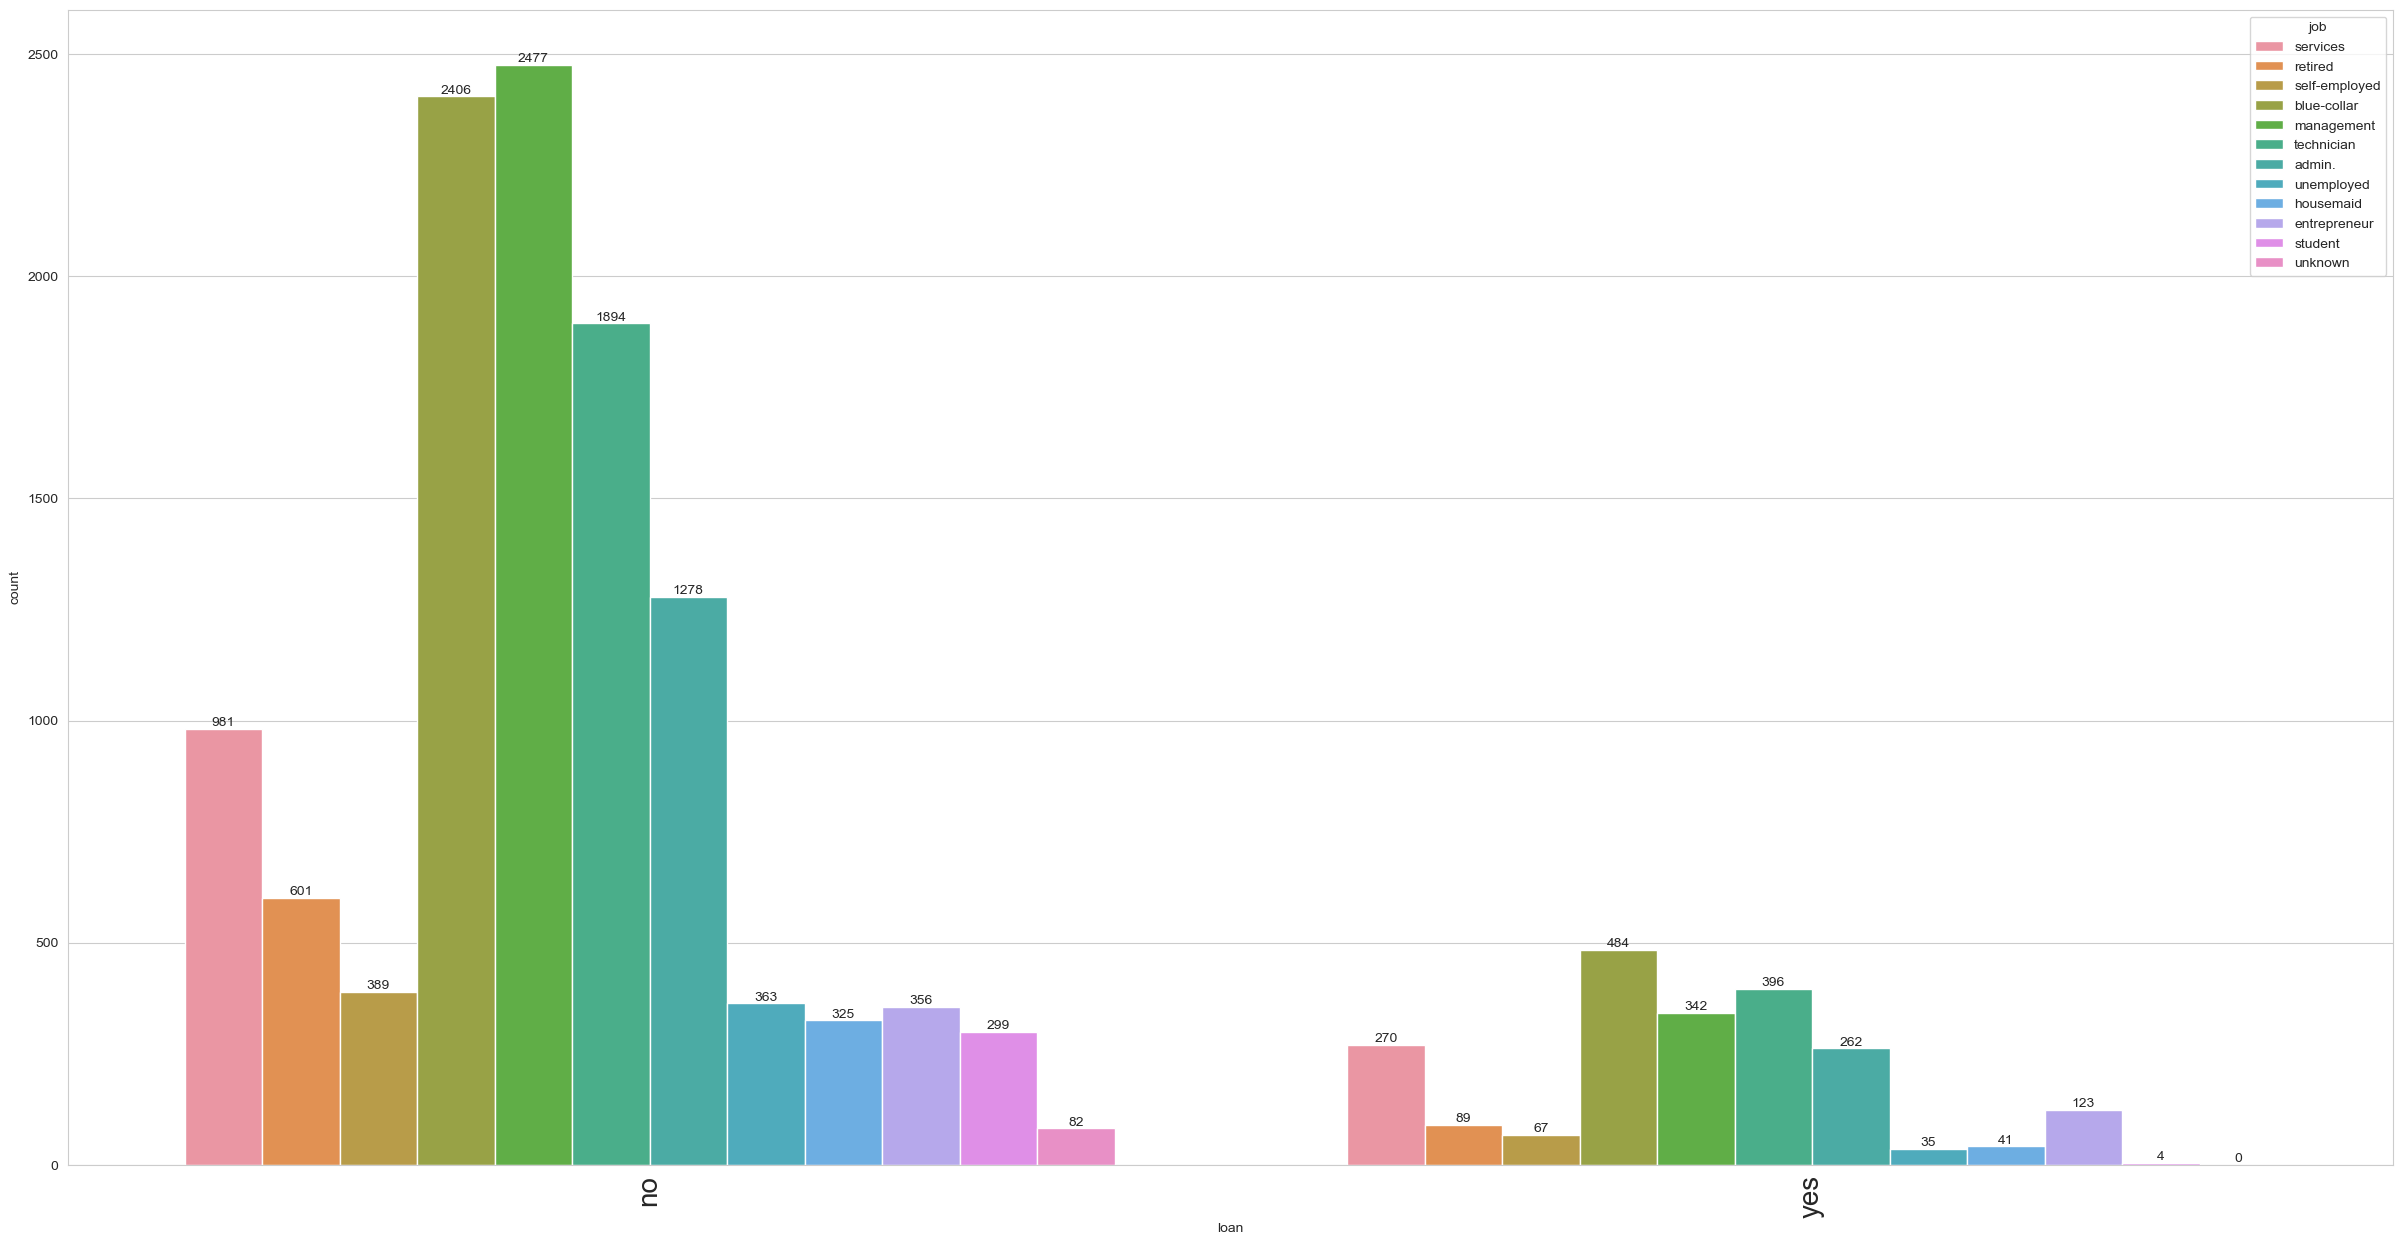

In [124]:
plt.figure(figsize=(30,15))
x=sns.countplot(data=Bank_TD_Test,x="loan",hue='job')
plt.xticks(rotation=90,fontsize=20)
for i in x.containers:
    x.bar_label(i)

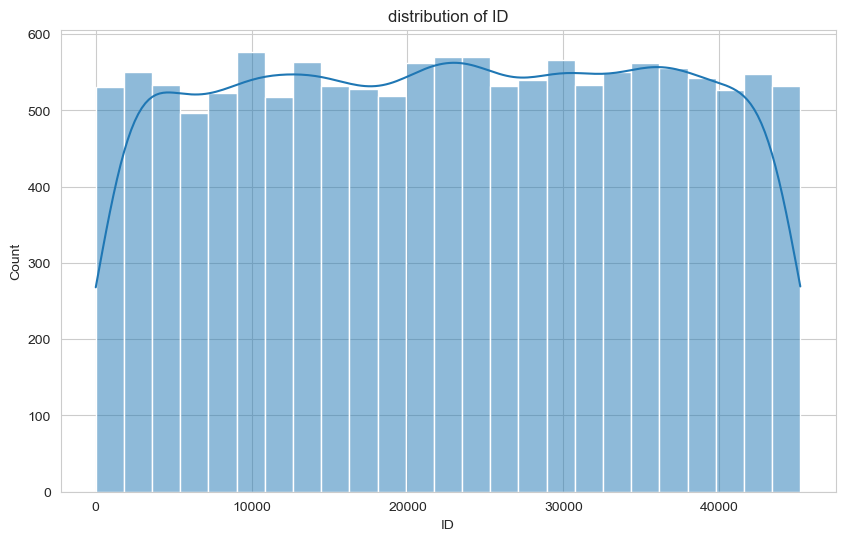

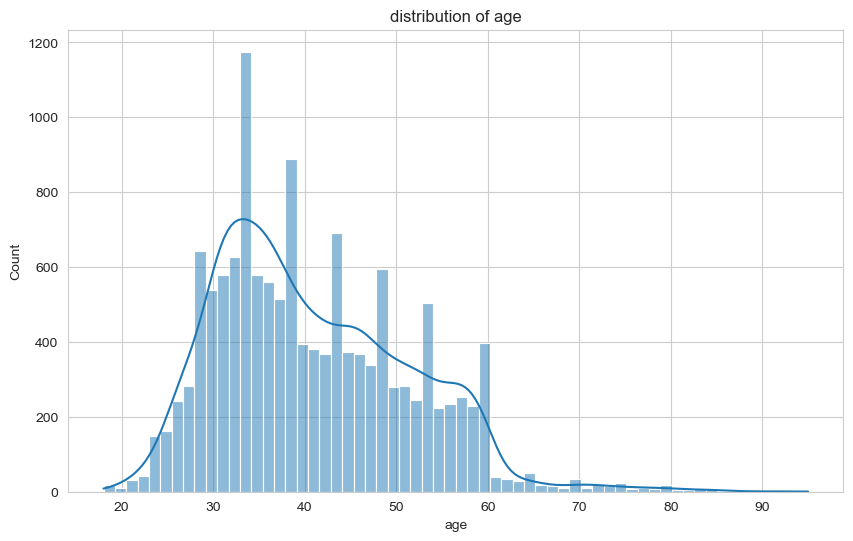

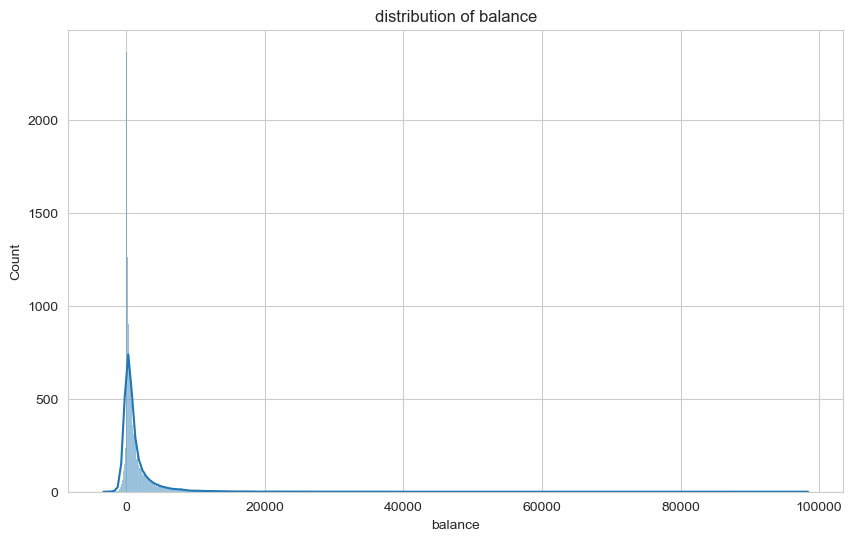

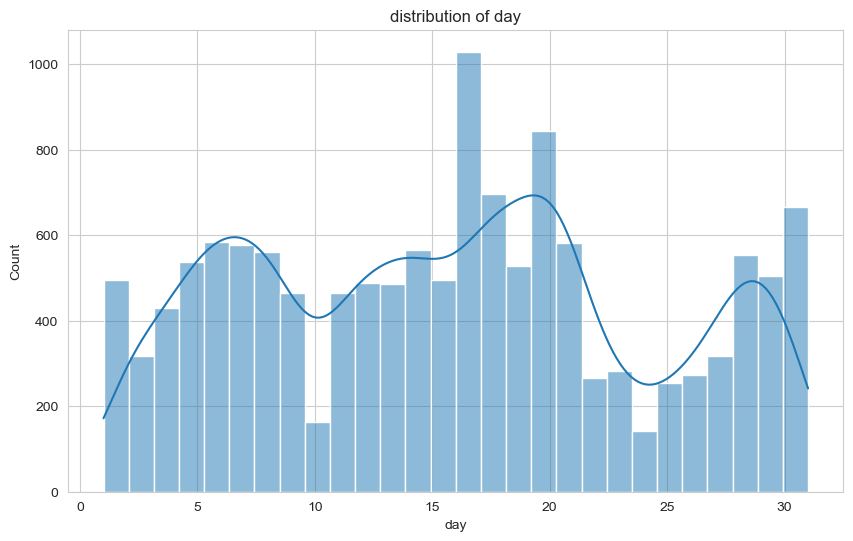

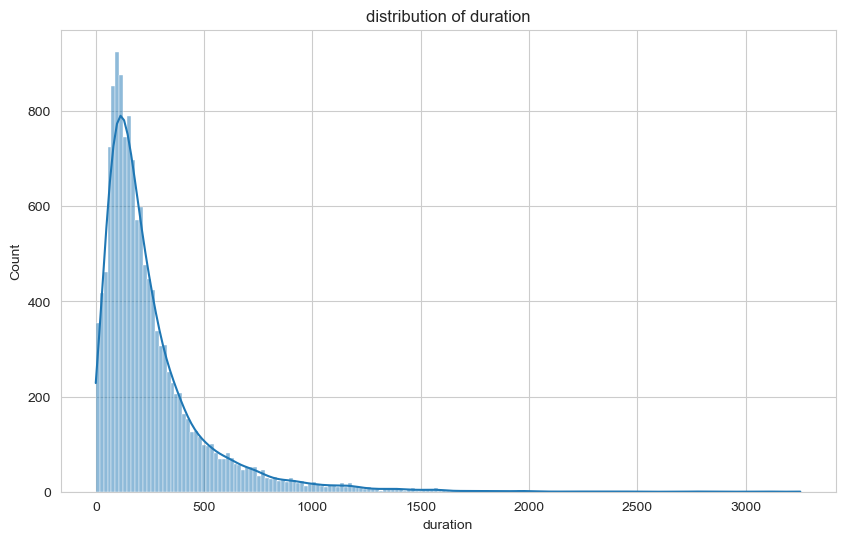

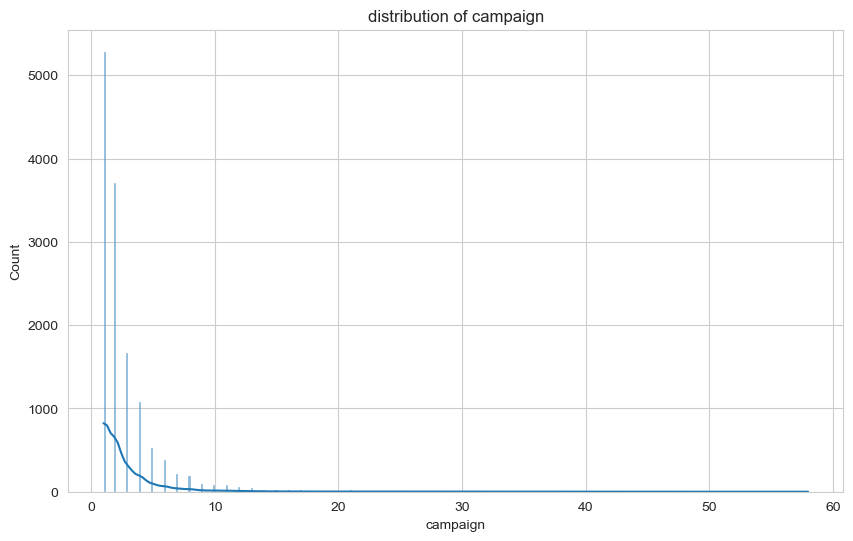

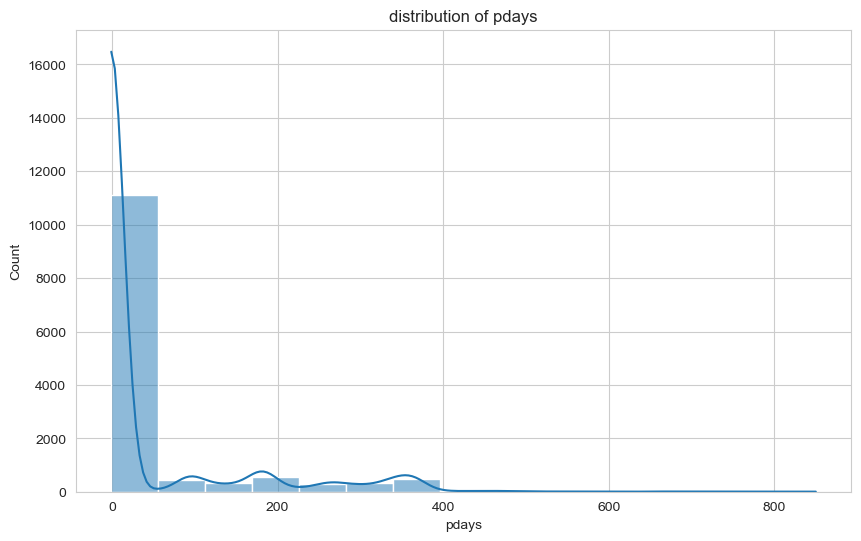

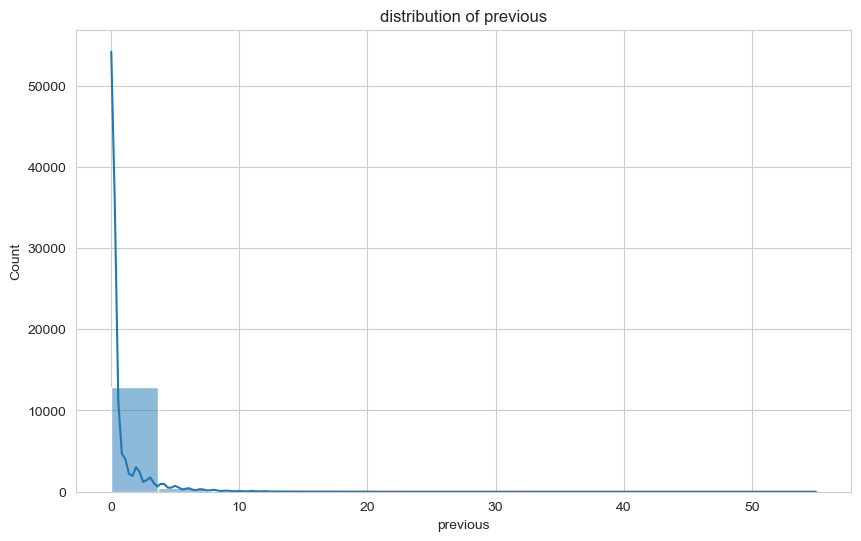

In [125]:
for i in Bank_TD_Test.columns:
    if Bank_TD_Test[i].dtype !="object":
        plt.figure(figsize=(10,6))
        sns.histplot(Bank_TD_Test[i], kde=True)
        plt.title(f"distribution of {i}")

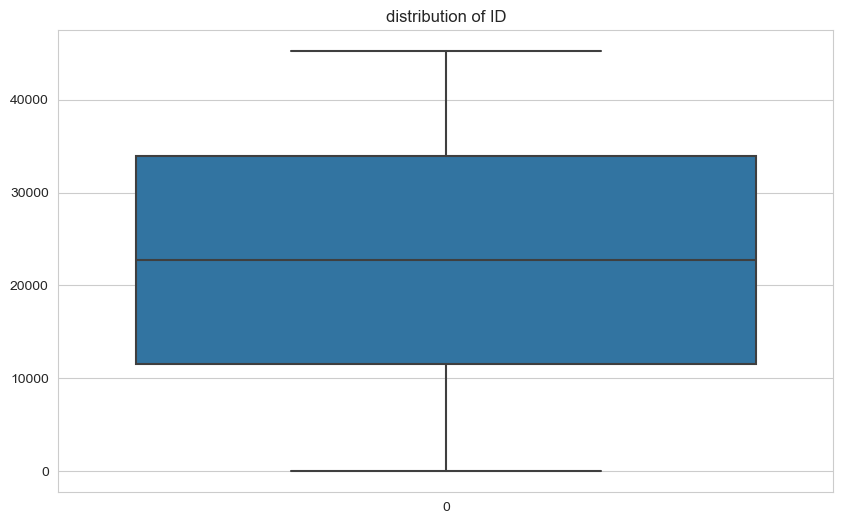

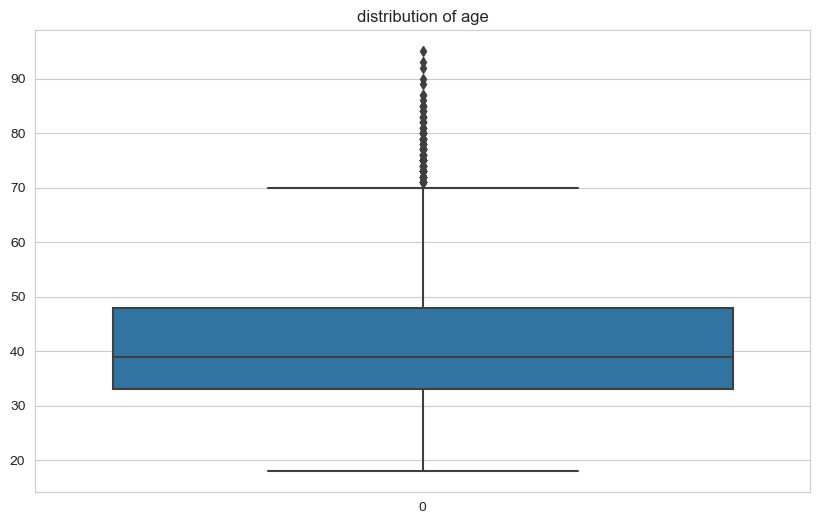

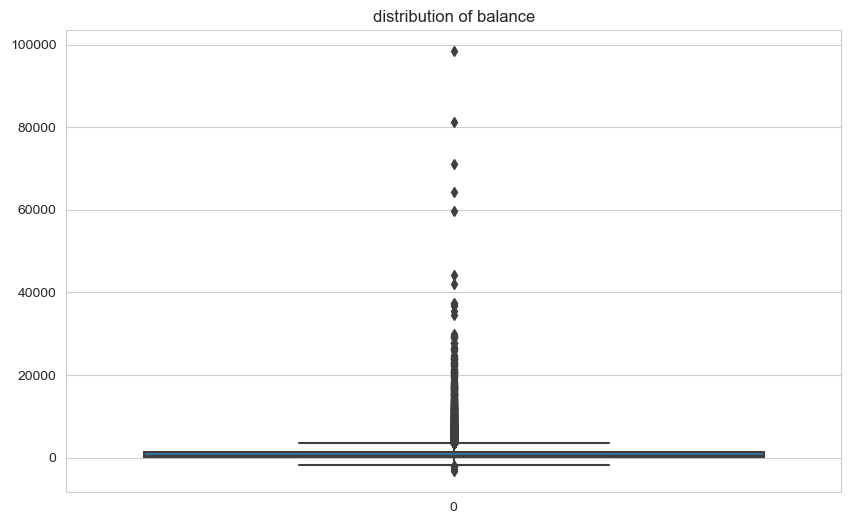

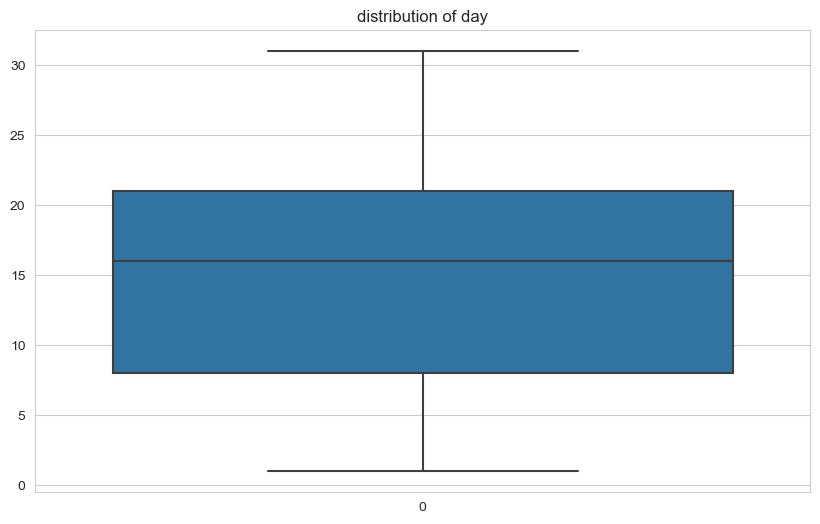

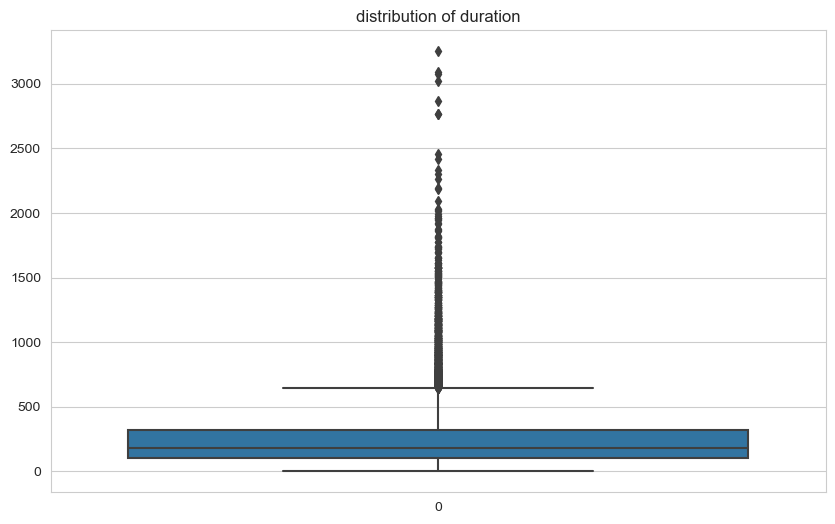

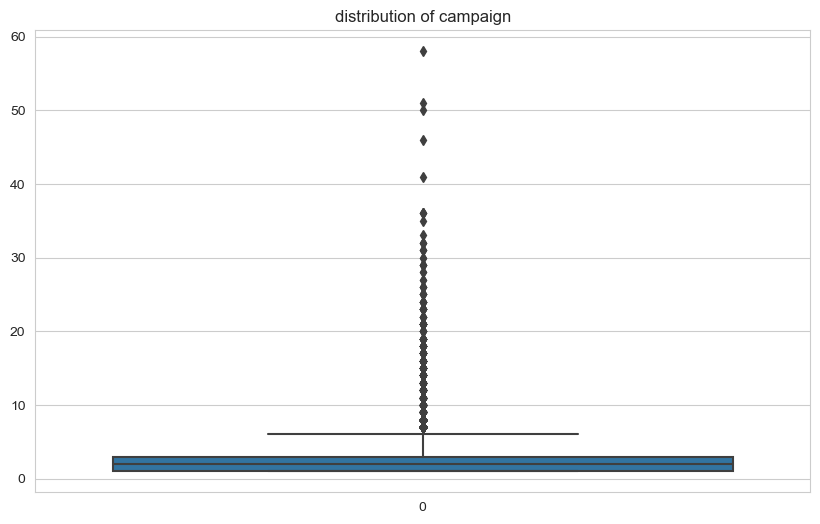

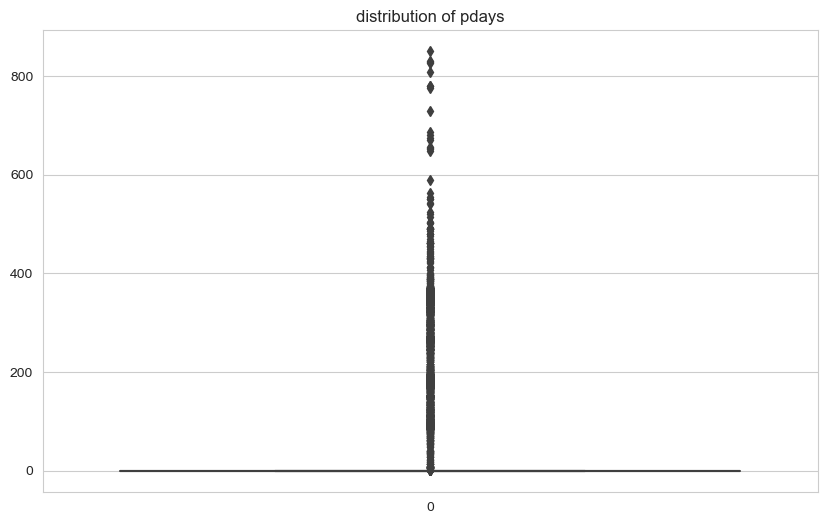

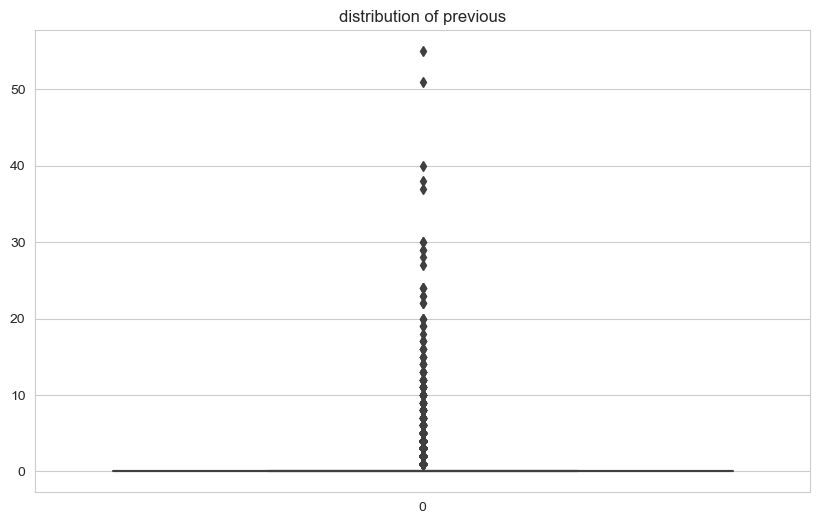

In [126]:
for i in Bank_TD_Test.columns:
    if Bank_TD_Test[i].dtype !="object":
        plt.figure(figsize=(10,6))
        sns.boxplot(Bank_TD_Test[i])
        plt.title(f"distribution of {i}")

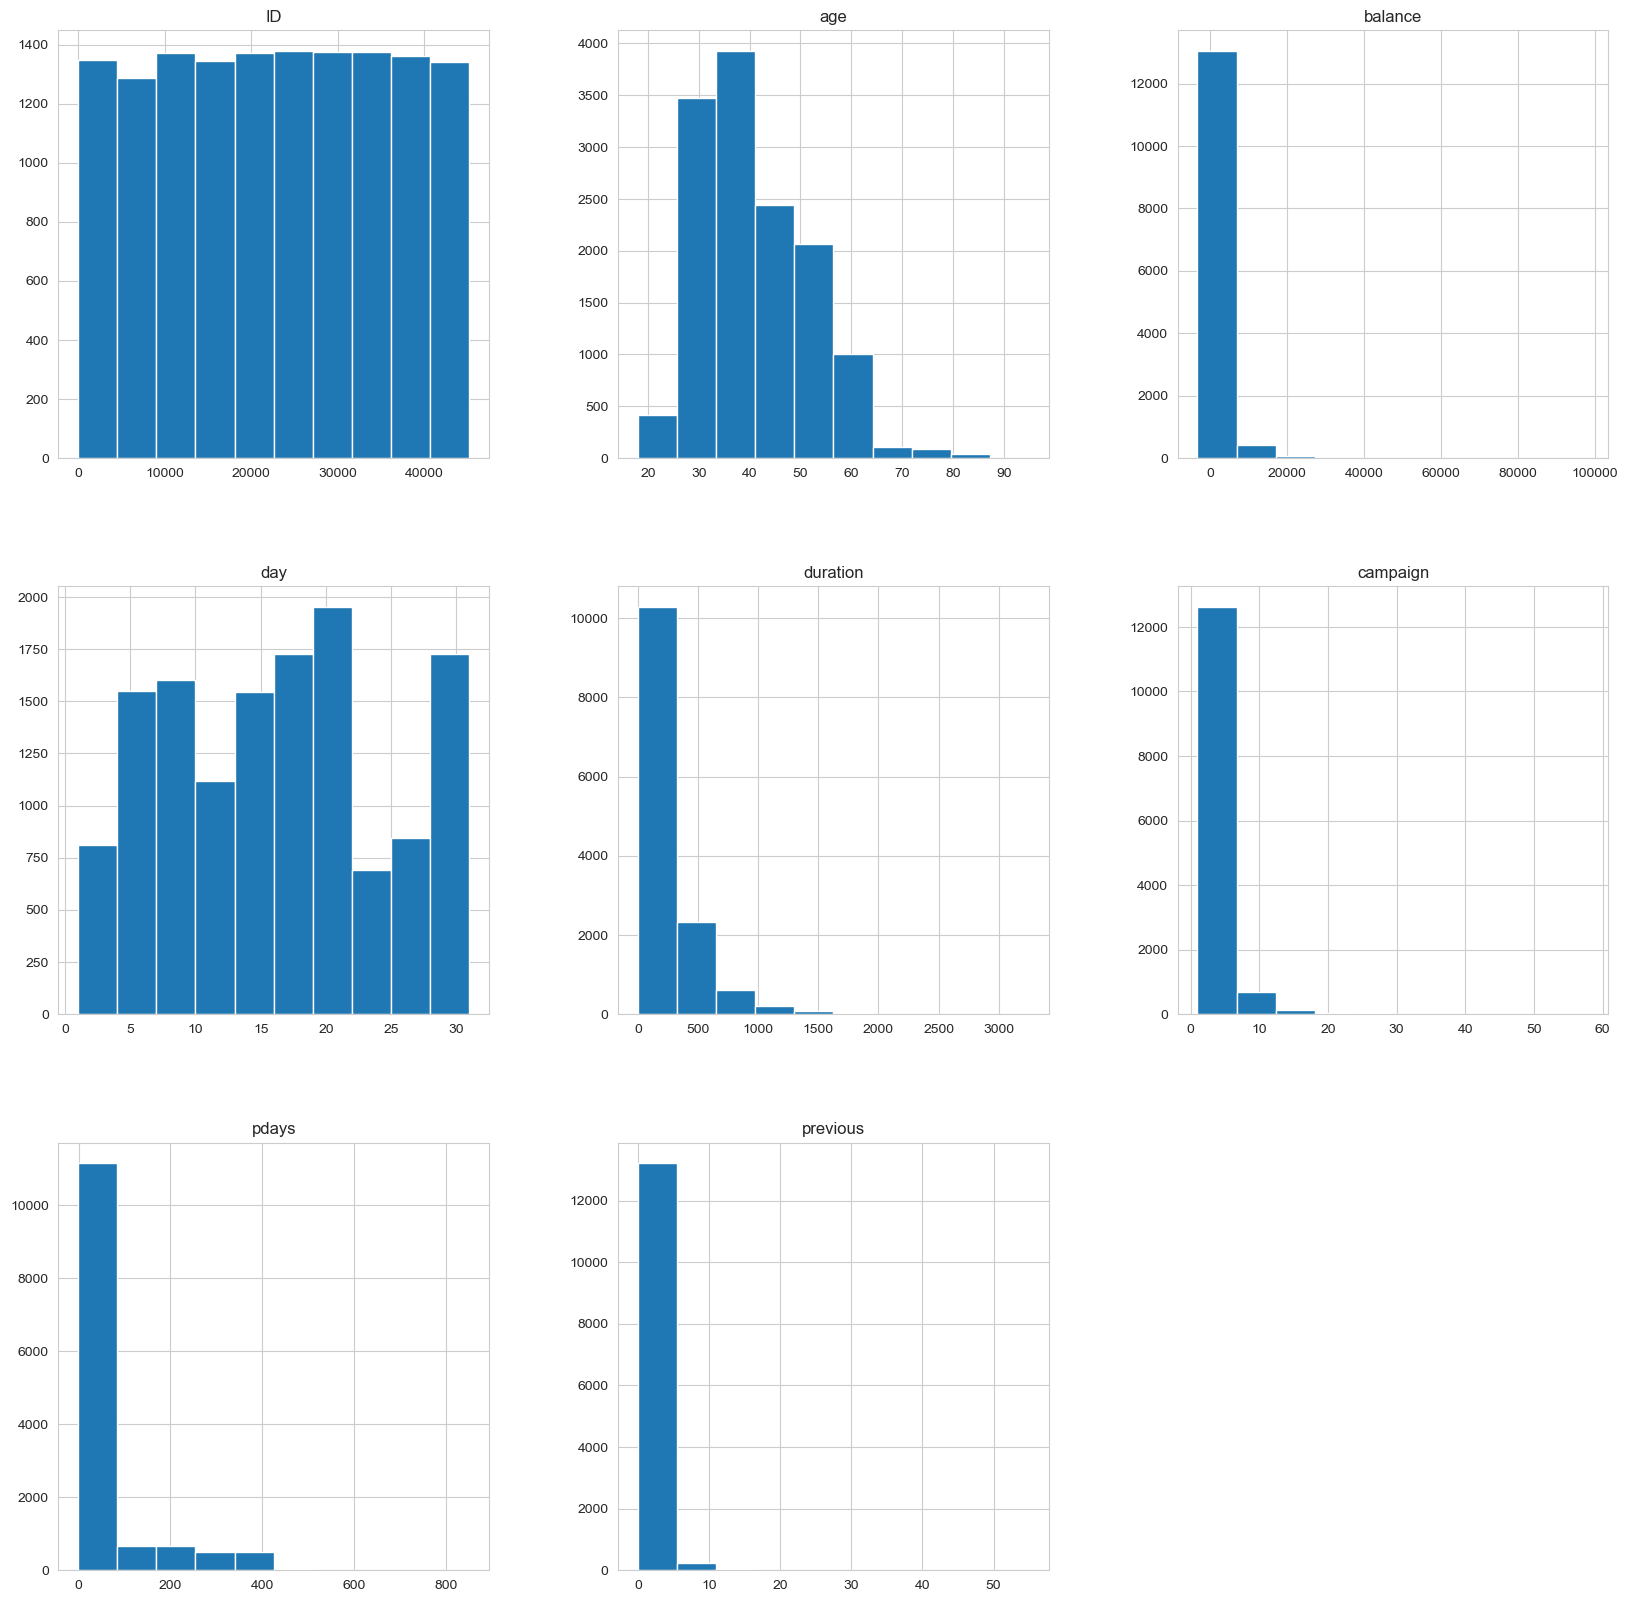

In [127]:
Bank_TD_Test.hist(figsize=(20,20))
plt.show()

Converting Categorical Data into Numerical data

In [128]:
for i in Bank_TD_Test.columns:
    if Bank_TD_Test[i].dtype =="object":
        le=LabelEncoder()
        Bank_TD_Test[i]=le.fit_transform(Bank_TD_Test[i])

## Removing outliers for testing data

In [129]:
from scipy.stats import zscore
z=np.abs(zscore(Bank_TD_Test))
threshold=3
np.where(z>3)
Bank_TD_Test=Bank_TD_Test[(z<3).all(axis=1)]
Bank_TD_Test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
5,16013,32,4,2,2,0,0,1,0,0,22,5,455,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,35237,32,9,2,1,0,129,1,0,0,7,8,213,1,-1,0,3
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3


In [130]:
Bank_TD_Test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
5,16013,32,4,2,2,0,0,1,0,0,22,5,455,2,-1,0,3


#### Loading the Saved Model from Training data and predict test data

In [131]:
import pickle
Model_load=pickle.load(open('rfcfile_bnpd.obj','rb'))
Model_predict=rfc.predict(Bank_TD_Test)

In [132]:
Model_predict

array([0, 0, 0, ..., 0, 0, 1])